In [1]:
import numpy as np
from nltk.tokenize import WordPunctTokenizer
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import tensorflow as tf
from keras.models import load_model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import re
from tensorflow.keras import layers
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import seed
from keras.layers import Input, Dropout, Dense, Activation, LSTM, GRU, TimeDistributed, RepeatVector
from keras.models import Model
import csv

In [3]:
seed(10)
tf.random.set_seed(10)

In [4]:
def tokenizing(X, data):
    gfg0 = []
    tk = WordPunctTokenizer()
    for i in range(X):
        gfg = data.loc[i]
        gfg = str(gfg)
        gfg = gfg.replace('%20', ' %20 ')
        gfg = gfg.replace('&', ' & ')
        gfg = gfg.replace('%', ' % ')
        gfg = tk.tokenize(gfg)
        
        Y = len(gfg)
        p = 0
        r = 0
        while p < len(gfg):
            k = re.findall(r"[?]", gfg[p])
            if k:
                gfg[p-p] = '_URL_'
                for j in range(4, p):
                    del gfg[p-j]
            else:
                p = p + 1
        
        while r < len(gfg):
            f = re.findall(r"%", gfg[r])
            if f:
                h = re.findall(r"20", gfg[r+1])
                if h:
                    gfg[r:r+2] = [''.join(gfg[r : r+2])]
                else:
                    r = r + 1
            else:
                r = r + 1

        for i in range(4, len(gfg)):
            a = re.findall(r"_URL_|jsp|modo|login|password|nombre|apellidos|email|dni|direccion|ciudad|provincia|cp|ntc|B1", gfg[i])
            if not a:
                b = re.findall(r"[a-z]", gfg[i])
                f = re.findall(r"[A-Z]", gfg[i])
                c = re.findall(r"\d", gfg[i])
                m = re.findall(r"\s", gfg[i])
                d = re.findall(r"[~,!,`,@,#,$,^,*,(,),-,_,+,{,},[,],|,\\,/,,:,;,<,>]", gfg[i])
                g = re.findall(r"'|--|-|:|,|~|!|@|#|_|{|}|]|\||/|;|<|>", gfg[i])

                if b and f:
                    gfg[i] = 'CapitalLowerAlpha'
                    continue
                if b and c:
                    gfg[i] = 'AlphaNum'
                    continue
                if f and c:
                    gfg[i] = 'ALPHANUM'
                    continue    
                if b and f and c:
                    gfg[i] = 'CapitalLowerAlphaNum'
                    continue
                if k or m:
                    gfg[i] = 'Space'
                    continue
                if f:
                    gfg[i] = 'ALPHA'
                    continue
                if b and not c:
                    gfg[i] = 'Alpha'
                    continue
                if b:
                    gfg[i] = 'Alpha'
                    continue
                if not b and c:
                    gfg[i] = 'Num'
                    continue
                if c:
                    gfg[i] = 'Num'
                    continue
                if g:
                    gfg[i] = 'SpecialChar'
                    continue
        gfg0.append(gfg)
    return gfg0


In [5]:
def token(X,listset,dataset,data):
    tokenizer = Tokenizer(num_words = 10, split=' ')
    for i in range(X):    
        tokenizer.fit_on_texts(listset[i])
        seqs = tokenizer.texts_to_sequences(listset[i])
        pad_seqs = pad_sequences(seqs, 1)
        arr = np.array(pad_seqs)
        df = pd.DataFrame(data=arr.flatten())
        dataset = pd.concat([data, df], axis=1)
        return dataset

In [6]:
def inputs(X):
    print("X size = ", X.shape)
    print("Y size = ", X.shape)
    X = X.transpose()
    print("X size = ", X.shape)
    print("Y size = ", X.shape)
    return X

In [7]:
num_words = 1000
maxlen = 50
embed_dim = 5
batch_size = 10
number_of_epochs = 5
validation_split = 0.20
verbosity_mode = 1

In [8]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
colnames = ['URL']
data = pd.read_csv('C:/data/trainurldata.csv', sep=';', names=colnames)

In [9]:
Xnum = data.shape[0]
print(Xnum)

5193


In [10]:
gfg1 = tokenizing(Xnum,data)

In [11]:
print(len(gfg1))

5193


In [12]:
print(gfg1[12])
print(gfg1[13])

['_URL_', 'registro', '.', 'jsp', '?', 'modo', '=', 'Alpha', '&', 'login', '=', 'AlphaNum', '&', 'password', '=', 'AlphaNum', '&', 'nombre', '=', 'Alpha', '&', 'apellidos', '=', 'Alpha', '&', 'email', '=', 'Alpha', '&', 'dni', '=', 'Alpha', '&', 'direccion', '=', 'CapitalLowerAlpha', '.+', 'CapitalLowerAlpha', '+', 'CapitalLowerAlpha', '+', 'CapitalLowerAlpha', '%', 'ALPHANUM', '+', 'Num', '%', 'ALPHANUM', '+', 'ALPHANUM', '&', 'ciudad', '=', 'Alpha', '&', 'provincia', '=', 'Num', '&', 'cp', '=', 'Num', '&', 'ntc', '=', 'Num', '&', 'B1', '=', 'CapitalLowerAlpha', 'CapitalLowerAlpha', 'SpecialChar', 'Num', 'SpecialChar', 'Alpha', 'SpecialChar', 'Alpha']
['_URL_', 'registro', '.', 'jsp', '?', 'modo', '=', 'Alpha', '&', 'login', '=', 'AlphaNum', '&', 'password', '=', 'AlphaNum', '&', 'nombre', '=', 'Alpha', '&', 'apellidos', '=', 'Alpha', '&', 'email', '=', 'Alpha', '&', 'dni', '=', 'Alpha', '&', 'direccion', '=', 'ALPHA', '%', 'ALPHANUM', '+', 'CapitalLowerAlpha', '+', 'CapitalLowerAlpha

In [13]:
tokenizer = Tokenizer(num_words, split=' ')
tokenizer.fit_on_texts(gfg1)
seqs = tokenizer.texts_to_sequences(gfg1)
pad_seqs = pad_sequences(seqs, maxlen)

In [14]:
print(pad_seqs[12])
print(pad_seqs[13])
print(pad_seqs[1000])

[ 3  2 19  1  3  2 20  1  5 29  5 27  5 27  5  8  6 27  4  8  6 27  6  2
 21  1  3  2 22  1  4  2 23  1  4  2 24  1  4  2 25  1  5  5  7  4  7  3
  7  3]
[19  1  3  2 20  1  3  8  6 27  5 27  5 27  5  8  6 27  4  8  6 27  6  2
 21  1  3  2 22  1  4  2 23  1  4  2 24  1  4  2 25  1  5  5  7  4  7  3
  7  3]
[ 6  8  5  2 18  1  3  9  3  8  6  7  3  9  3  2 19  1  6  2 20  1  3  2
 21  1  3  2 22  1  4  2 23  1  4  2 24  1  4  2 25  1  5  5  7  4  7  3
  7  3]


In [15]:
dataEm = pd.read_csv('C:/data/tes.csv')

In [16]:
for i in range(len(pad_seqs)):
    df = pd.DataFrame(data=pad_seqs[i].flatten())
    dataEm = pd.concat([dataEm, df], axis=1)

In [17]:
dataEm.drop('emb', inplace=True, axis=1)

In [ ]:
dataEm.to_csv('E:/data/test/trainembab50data.csv', index=False)

In [16]:
feattrain = pd.read_csv('C:/data/trainembab50data.csv')
print("X size = ", feattrain.shape)
print("Y size = ", feattrain.shape)

X size =  (50, 5193)
Y size =  (50, 5193)


In [17]:
feattrain = feattrain.transpose()
print("X size = ", feattrain.shape)
print("Y size = ", feattrain.shape)

X size =  (5193, 50)
Y size =  (5193, 50)


In [18]:
feattrain = feattrain.values.reshape(feattrain.shape[0], 1, feattrain.shape[1])
print(feattrain.shape)

(5193, 1, 50)


In [6]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
colnames = ['URL']
data = pd.read_csv('C:/data/testurldata.csv', sep=';', names=colnames, on_bad_lines='skip')


In [7]:
Ynum = data.shape[0]
print(Ynum)

51207


In [519]:
gfg2 = tokenizing(Ynum,data)

In [520]:
print(len(gfg2))

51207


In [521]:
tokenizer = Tokenizer(num_words, split=' ')
tokenizer.fit_on_texts(gfg2)
seqs = tokenizer.texts_to_sequences(gfg2)
pad_seqstest = pad_sequences(seqs, maxlen)

In [522]:
dataEm = pd.read_csv('C:/data/tes.csv')

In [523]:
dataEm.drop('emb', inplace=True, axis=1)

In [ ]:
dataEm.to_csv('C:/data/testembab50data.csv', index=False)

In [ ]:
for i in range(len(pad_seqstest)):
    df = pd.DataFrame(data=pad_seqstest[i].flatten())
    dataEm = pd.concat([dataEm, df], axis=1)

In [19]:
feattest = pd.read_csv('C:/data/testembab50data.csv')
print("X size = ", feattest.shape)
print("Y size = ", feattest.shape)

X size =  (50, 51473)
Y size =  (50, 51473)


In [20]:
feattest = feattest.transpose()
print("X size = ", feattest.shape)
print("Y size = ", feattest.shape)

X size =  (51473, 50)
Y size =  (51473, 50)


In [21]:
feattest = feattest.values.reshape(feattest.shape[0], 1, feattest.shape[1])

In [22]:
def lstmautoencoder_model(X):
    encoder_inputs = Input(shape=(X.shape[1], X.shape[2]))

    l1 = LSTM(50, return_sequences = True)(encoder_inputs)
    l2 = LSTM(25, return_sequences = False)(l1)

    l3 = RepeatVector(X.shape[1])(l2)
    l4 = LSTM(25, return_sequences = True)(l3)
    l5 = LSTM(50, return_sequences = True)(l4)

    output = TimeDistributed(Dense(X.shape[2]))(l5)
    modellstm = Model(inputs = encoder_inputs, outputs = output)
    return modellstm

In [23]:
additional_metrics = ['accuracy']
modellstm = lstmautoencoder_model(feattrain)
modellstm.compile(optimizer='Nadam', loss='mae', metrics=additional_metrics)
modellstm.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 25)                  │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 1, 25)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1, 25)               │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 1, 50)               │          15,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 1, 50)               │           2,550 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,650 (197.85 KB)

 Trainable params: 50,650 (197.85 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
historylstm = modellstm.fit(feattrain, feattrain, epochs = 5, batch_size=5, validation_split=0.2).history

Epoch 1/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0808 - loss: 3.8072 - val_accuracy: 0.9038 - val_loss: 1.2737
Epoch 2/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7961 - loss: 1.4800 - val_accuracy: 0.9038 - val_loss: 1.1535
Epoch 3/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7961 - loss: 1.4713 - val_accuracy: 0.9038 - val_loss: 1.1543
Epoch 4/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7961 - loss: 1.4713 - val_accuracy: 0.9038 - val_loss: 1.1527
Epoch 5/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7961 - loss: 1.4712 - val_accuracy: 0.9038 - val_loss: 1.1541


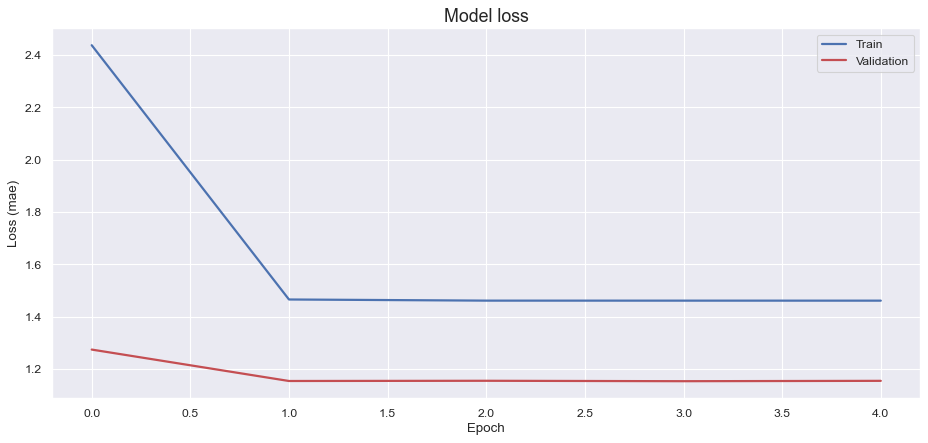

In [25]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(historylstm['loss'], 'b', label = 'Train', linewidth = 2)
ax.plot(historylstm['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc = 'upper right')
plt.show()

In [26]:
historylstm = modellstm.evaluate(feattest, feattest, verbose=1)

1609/1609 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.4488 - loss: 5.0259


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\vbabaey\AppData\Local\Temp\1\ipykernel_26384\819842361.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored_trainlstm['Loss_mae'], bins = 20, kde = True, color = 'blue')


(0.0, 7.0)

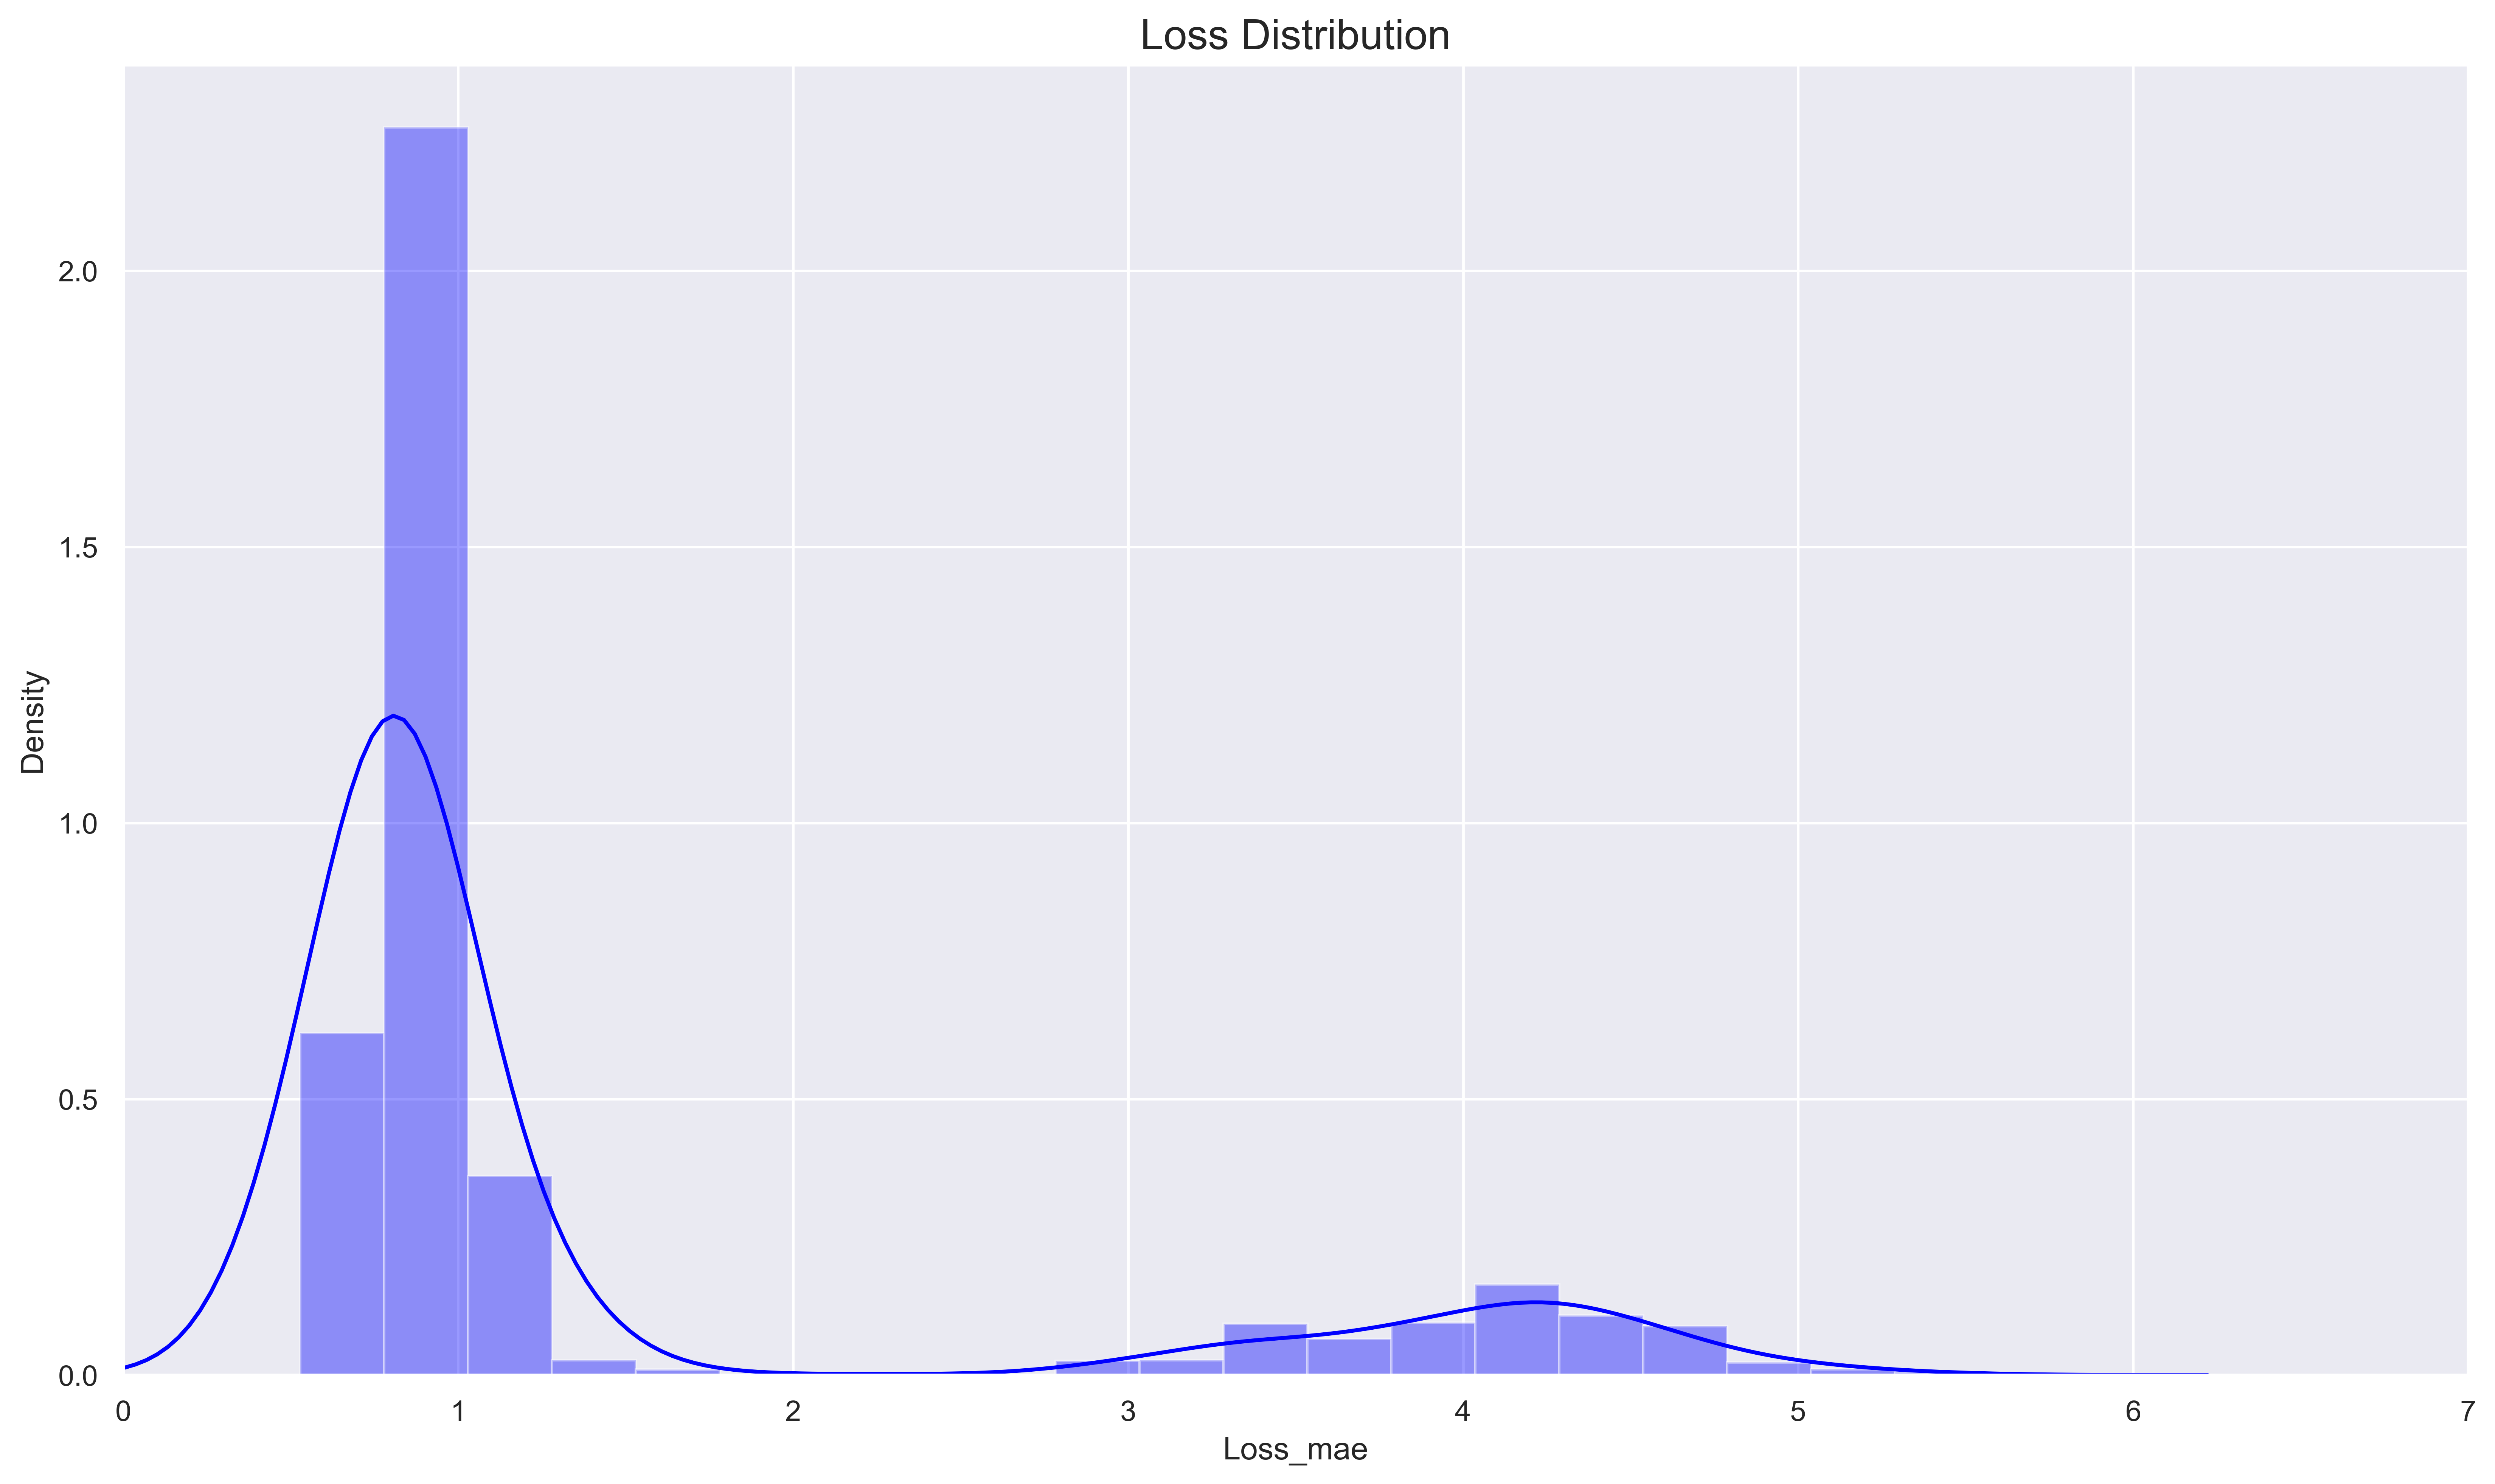

In [27]:
X_pred_train = modellstm.predict(feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_trainlstm = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])

scored_trainlstm['Loss_mae'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=500)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored_trainlstm['Loss_mae'], bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,7.0])

In [60]:
tresh = 4.6

In [29]:
X_pred_train = modellstm.predict(feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_trainlstm = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_trainlstm['Loss mae'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
scored_trainlstm['Treshhold'] = tresh
scored_trainlstm['Anomaly'] = scored_trainlstm['Loss mae'] > scored_trainlstm['Treshhold']

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


In [30]:
scored_trainlstm.head(10)

,Loss mae,Treshhold,Anomaly
0,4.319409,5.0,False
1,3.344288,5.0,False
2,4.363447,5.0,False
3,4.563944,5.0,False
4,4.578201,5.0,False
5,4.958978,5.0,False
6,4.138613,5.0,False
7,3.344288,5.0,False
8,4.281069,5.0,False
9,3.101299,5.0,False


In [31]:
scored_trainlstm['Anomaly'].value_counts()

False    5169
True       24
Name: Anomaly, dtype: int64

<Axes: >

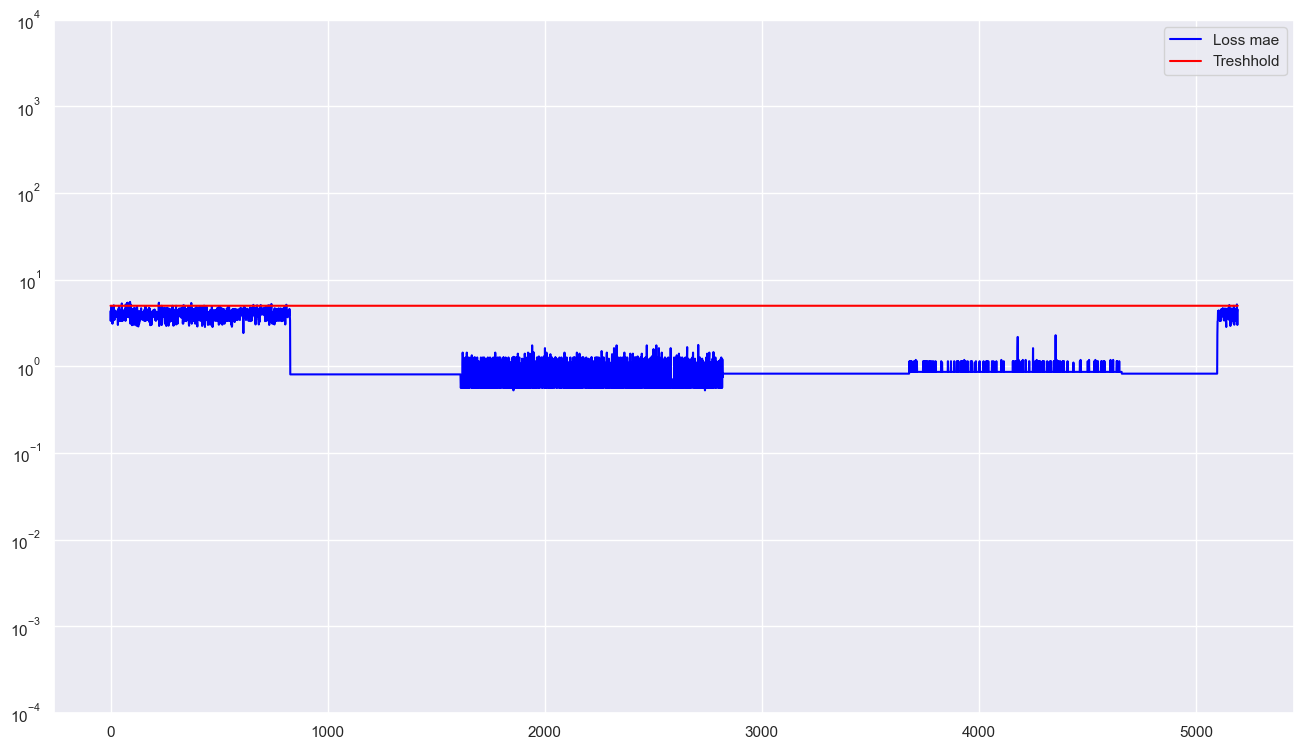

In [32]:
scored_trainlstm.plot(logy = True, figsize = (16,9), ylim = (1e-4,1e4), color = ['blue', 'red'])

In [61]:
X_pred = modellstm.predict(feattest)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred)

scoredlstm = pd.DataFrame()
Xtest = feattest.reshape(feattest.shape[0], feattest.shape[2])
scoredlstm['Loss mae'] = np.mean(np.abs(X_pred - Xtest), axis = 1)
scoredlstm['Treshhold'] = tresh
scoredlstm['Anomaly'] = scoredlstm['Loss mae'] > scoredlstm['Treshhold']


1609/1609 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step


In [62]:
scoredlstm.head(1250)

,Loss mae,Treshhold,Anomaly
0,3.818069,4.6,False
1,3.818069,4.6,False
2,3.818069,4.6,False
3,3.818069,4.6,False
4,3.818069,4.6,False
...,...,...,...
1245,4.520927,4.6,False
1246,4.057487,4.6,False
1247,4.520926,4.6,False
1248,4.057486,4.6,False


In [63]:
scoredlstm['Anomaly'].value_counts()

True     44376
False     7097
Name: Anomaly, dtype: int64

In [64]:
scored1lstm = scoredlstm.head(1299)

In [65]:
scored1lstm['Anomaly'].value_counts()

False    1285
True       14
Name: Anomaly, dtype: int64

In [71]:
scored2lstm = scoredlstm.tail(50174)

In [72]:
scored2lstm['Anomaly'].value_counts()

True     44362
False     5812
Name: Anomaly, dtype: int64

<Axes: >

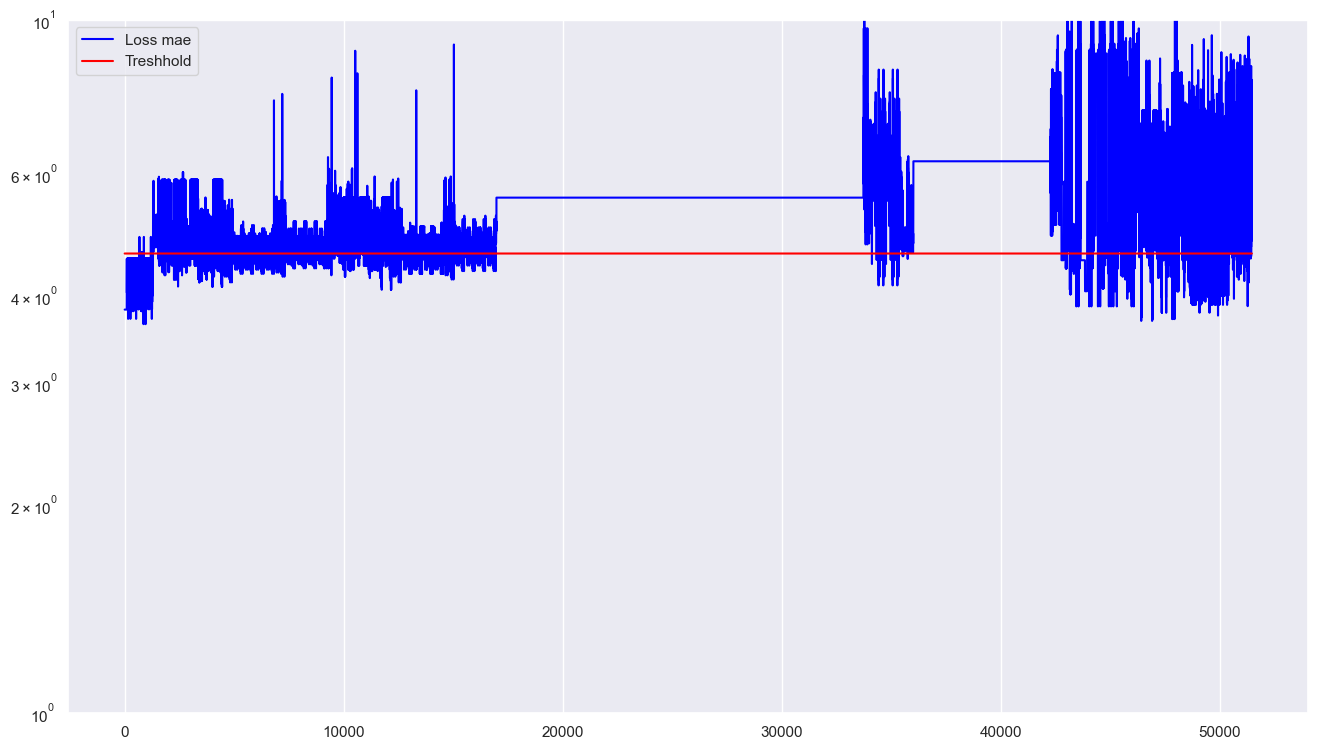

In [68]:
scoredlstm.plot(logy = True, figsize = (16,9), ylim = (1e-0,1e1), color = ['blue', 'red'])

In [69]:
X_pred_train = modellstm.predict(feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_trainlstm = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_trainlstm['Loss mse'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
scored_trainlstm['Treshhold'] = tresh
scored_trainlstm['Anomaly'] = scored_trainlstm['Loss mse'] > scored_trainlstm['Treshhold']
Scoredlstm = pd.concat([scored_trainlstm, scoredlstm])

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

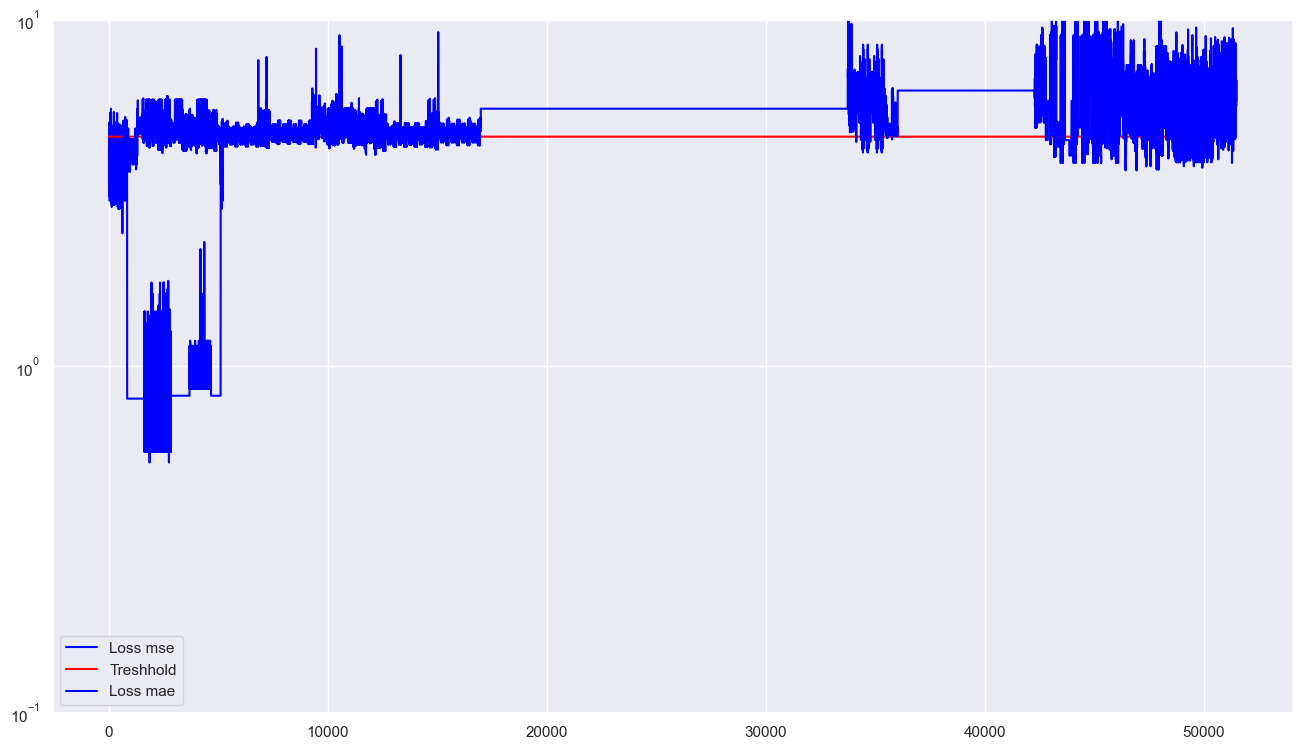

In [70]:
Scoredlstm.plot(logy = True, figsize = (16,9), ylim = (1e-1,1e1), color = ['blue', 'red'])

In [380]:
# Total Number of Records = 51475
T = 51473
CP = 44362 + 1285
# TN = Records which were really FALSE and predicted FALSE => 1285
TN = 1285

# FP = Records which were really FALSE but predicted TRUE => 14
FP = 14

# FN = Records which were really TRUE but predicted FALSE => 4543
FN = 5812

# TP = Records which were really TRUE and predicted TRUE => 45633
TP = 44362

In [381]:
# Accuracy = (Number of correct predictions) / (Total number of predictions)

Accuracy = CP/T
print(Accuracy)

0.8868144464087968


In [382]:
Recall = TP / (TP+FN)


print(Recall)

0.8841631123689561


In [383]:
Specificity = TN / (TN+FP)


print(Specificity)

0.9892224788298691


In [384]:
Precision = TP / (TP+FP)


print(Precision)

0.9996845141517937


In [385]:
FP_rate = 1 - Specificity


print(FP_rate)

0.010777521170130866


In [386]:
F1_score = 2 * ((Precision * Recall) / (Precision + Recall))

print(F1_score)

0.9383818085668958


In [79]:
def gruautoencoder_model(X):
    encoder_inputs = Input(shape=(X.shape[1], X.shape[2]))

    l1 = GRU(50, return_sequences = True)(encoder_inputs)
    l2 = GRU(25, return_sequences = False)(l1)

    l3 = RepeatVector(X.shape[1])(l2)
    l4 = GRU(25, return_sequences = True)(l3)
    l5 = GRU(50, return_sequences = True)(l4)

    output = TimeDistributed(Dense(X.shape[2]))(l5)
    modelgru = Model(inputs = encoder_inputs, outputs = output)
    return modelgru

In [80]:
additional_metrics = ['accuracy']
modelgru = gruautoencoder_model(feattrain)
modelgru.compile(optimizer='Nadam', loss='mae', metrics=additional_metrics)
modelgru.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 1, 50)               │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 25)                  │           5,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 1, 25)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 1, 25)               │           3,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 50)               │          11,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 1, 50)               │           2,550 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,075 (152.64 KB)

 Trainable params: 39,075 (152.64 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
historygru = modelgru.fit(feattrain, feattrain, epochs = 5, batch_size=10, validation_split=0.2).history

Epoch 1/5
416/416 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0056 - loss: 4.3839 - val_accuracy: 0.9038 - val_loss: 1.3406
Epoch 2/5
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 1.4877 - val_accuracy: 0.9038 - val_loss: 1.1767
Epoch 3/5
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 1.4716 - val_accuracy: 0.9038 - val_loss: 1.1553
Epoch 4/5
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 1.4708 - val_accuracy: 0.9038 - val_loss: 1.1558
Epoch 5/5
416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 1.4706 - val_accuracy: 0.9038 - val_loss: 1.1550


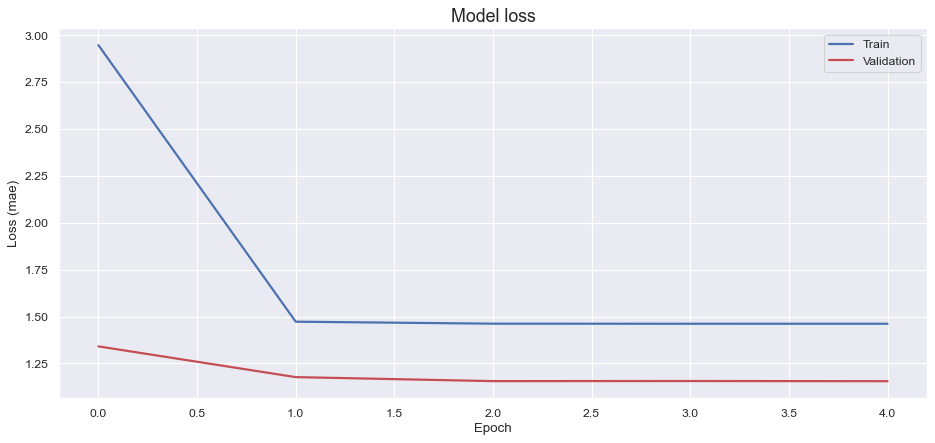

In [82]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(historygru['loss'], 'b', label = 'Train', linewidth = 2)
ax.plot(historygru['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc = 'upper right')
plt.show()

In [83]:
historygru = modelgru.evaluate(feattest, feattest, verbose=1)

1609/1609 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.4488 - loss: 5.0272


163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


C:\Users\vbabaey\AppData\Local\Temp\1\ipykernel_26384\4283529427.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored_traingru['Loss_mae'], bins = 20, kde = True, color = 'blue')


(0.0, 7.0)

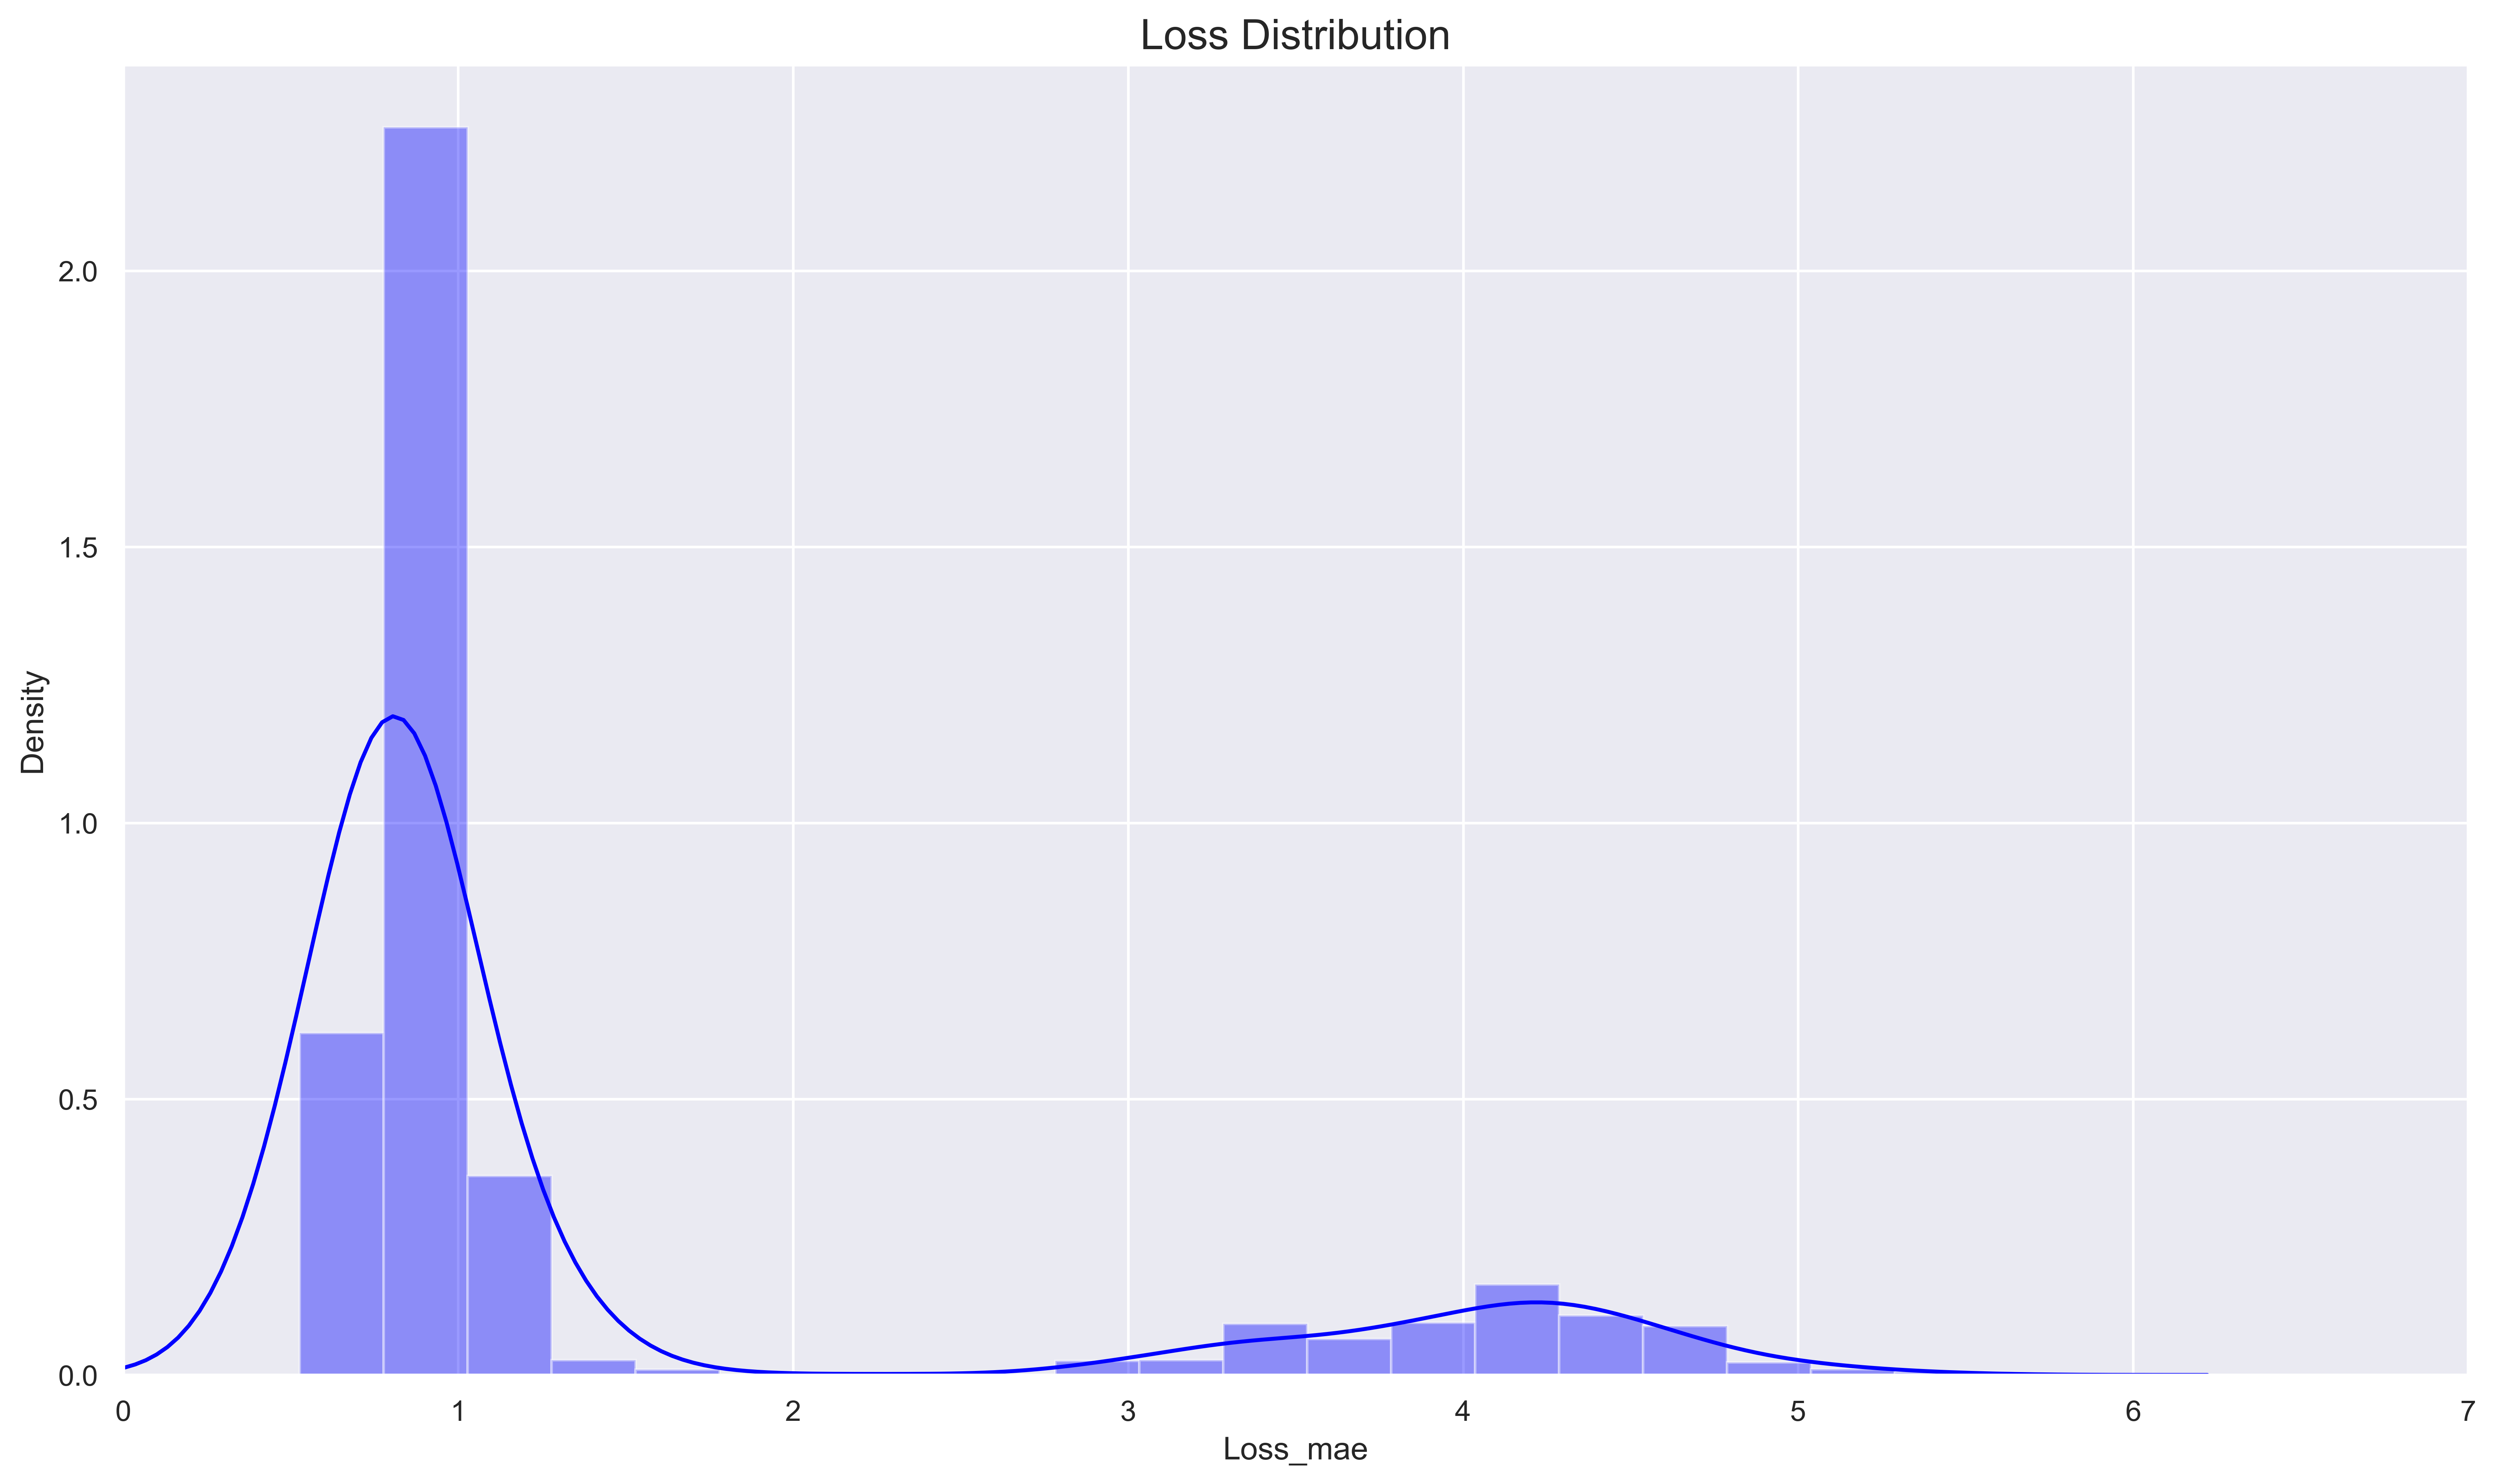

In [84]:
X_pred_train = modelgru.predict(feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_traingru = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_traingru['Loss_mae'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=500)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored_traingru['Loss_mae'], bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,7.0])

In [110]:
tresh = 4.6

In [111]:
X_pred_train = modelgru.predict(feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_traingru = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_traingru['Loss mae'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
scored_traingru['Treshhold'] = tresh
scored_traingru['Anomaly'] = scored_traingru['Loss mae'] > scored_traingru['Treshhold']

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [112]:
scored_traingru.head(10)

,Loss mae,Treshhold,Anomaly
0,4.319988,4.6,False
1,3.343254,4.6,False
2,4.364168,4.6,False
3,4.564501,4.6,False
4,4.580114,4.6,False
5,4.961587,4.6,True
6,4.141545,4.6,False
7,3.343254,4.6,False
8,4.279278,4.6,False
9,3.102492,4.6,False


In [113]:
scored_traingru['Anomaly'].value_counts()

False    5078
True      115
Name: Anomaly, dtype: int64

<Axes: >

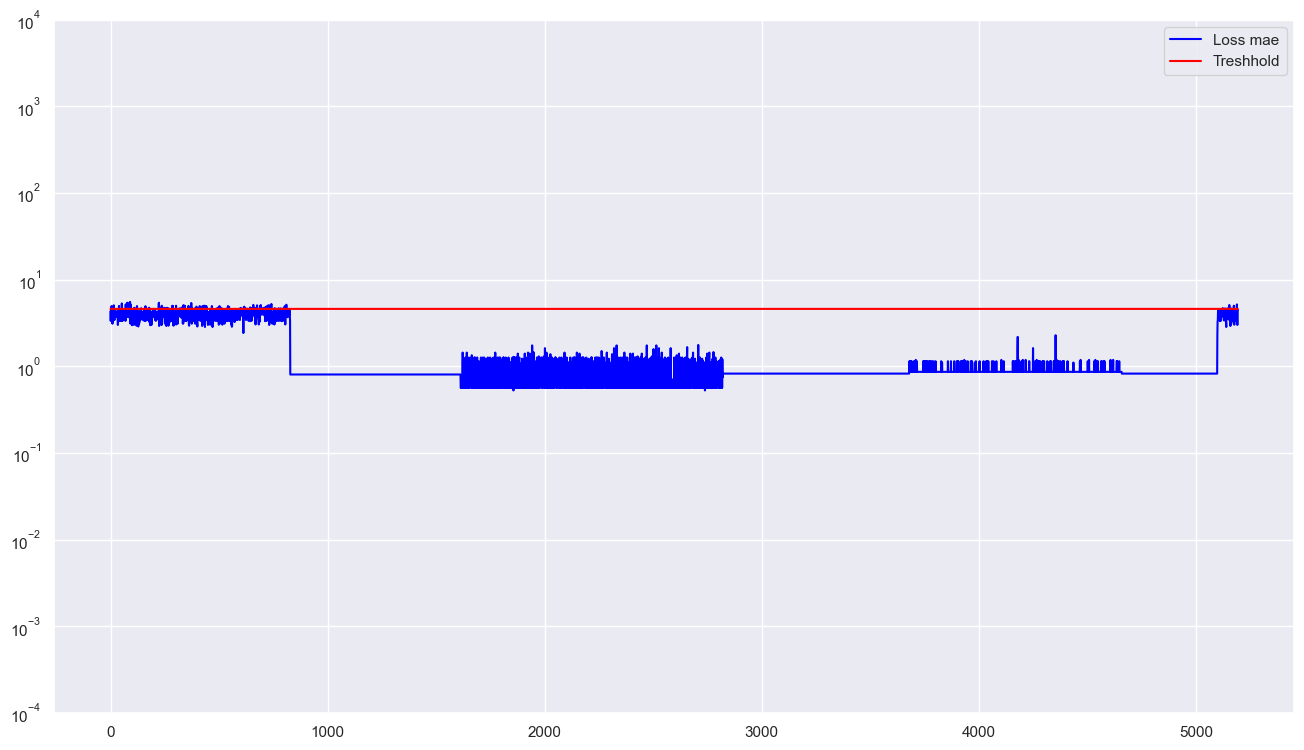

In [114]:
scored_traingru.plot(logy = True, figsize = (16,9), ylim = (1e-4,1e4), color = ['blue', 'red'])

In [115]:
X_pred = modelgru.predict(feattest)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred)

scoredgru = pd.DataFrame()
Xtest = feattest.reshape(feattest.shape[0], feattest.shape[2])
scoredgru['Loss mae'] = np.mean(np.abs(X_pred - Xtest), axis = 1)
scoredgru['Treshhold'] = tresh
scoredgru['Anomaly'] = scoredgru['Loss mae'] > scoredgru['Treshhold']

1609/1609 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step


In [116]:
scoredgru.head(40000)

,Loss mae,Treshhold,Anomaly
0,3.818391,4.6,False
1,3.818391,4.6,False
2,3.818391,4.6,False
3,3.818391,4.6,False
4,3.818391,4.6,False
...,...,...,...
39995,6.250795,4.6,True
39996,6.250795,4.6,True
39997,6.250795,4.6,True
39998,6.250795,4.6,True


In [117]:
scoredgru['Anomaly'].value_counts()

True     44381
False     7092
Name: Anomaly, dtype: int64

In [118]:
scored1gru = scoredgru.head(1299)

In [119]:
scored1gru['Anomaly'].value_counts()

False    1285
True       14
Name: Anomaly, dtype: int64

In [122]:
scored2gru = scoredgru.tail(50174)

In [123]:
scored2gru['Anomaly'].value_counts()

True     44367
False     5807
Name: Anomaly, dtype: int64

<Axes: >

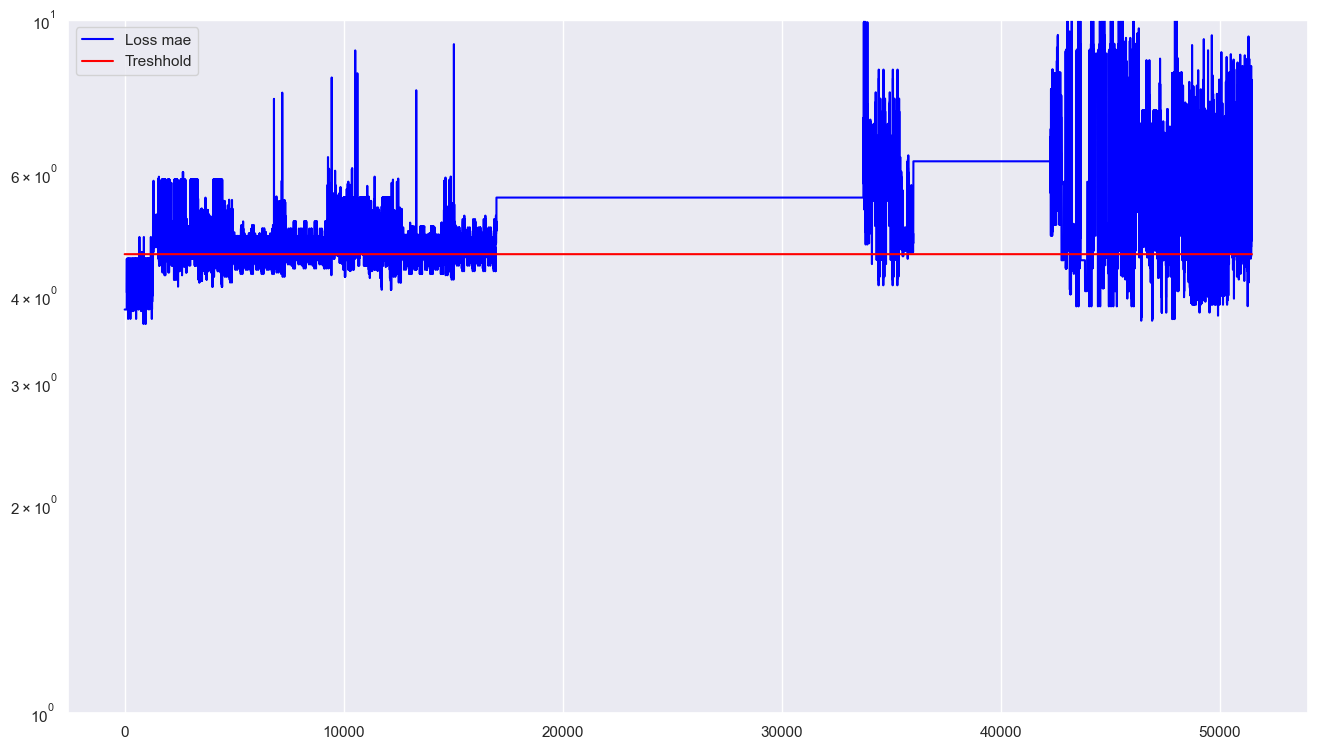

In [168]:
scoredgru.plot(logy = True, figsize = (16,9), ylim = (1e-0,1e1), color = ['blue', 'red'])

In [169]:
X_pred_train = modelgru.predict(feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_traingru = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_traingru['Loss mse'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
scored_traingru['Treshhold'] = tresh
scored_traingru['Anomaly'] = scored_traingru['Loss mse'] > scored_traingru['Treshhold']
scored1gru = pd.concat([scored_traingru, scoredgru])

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

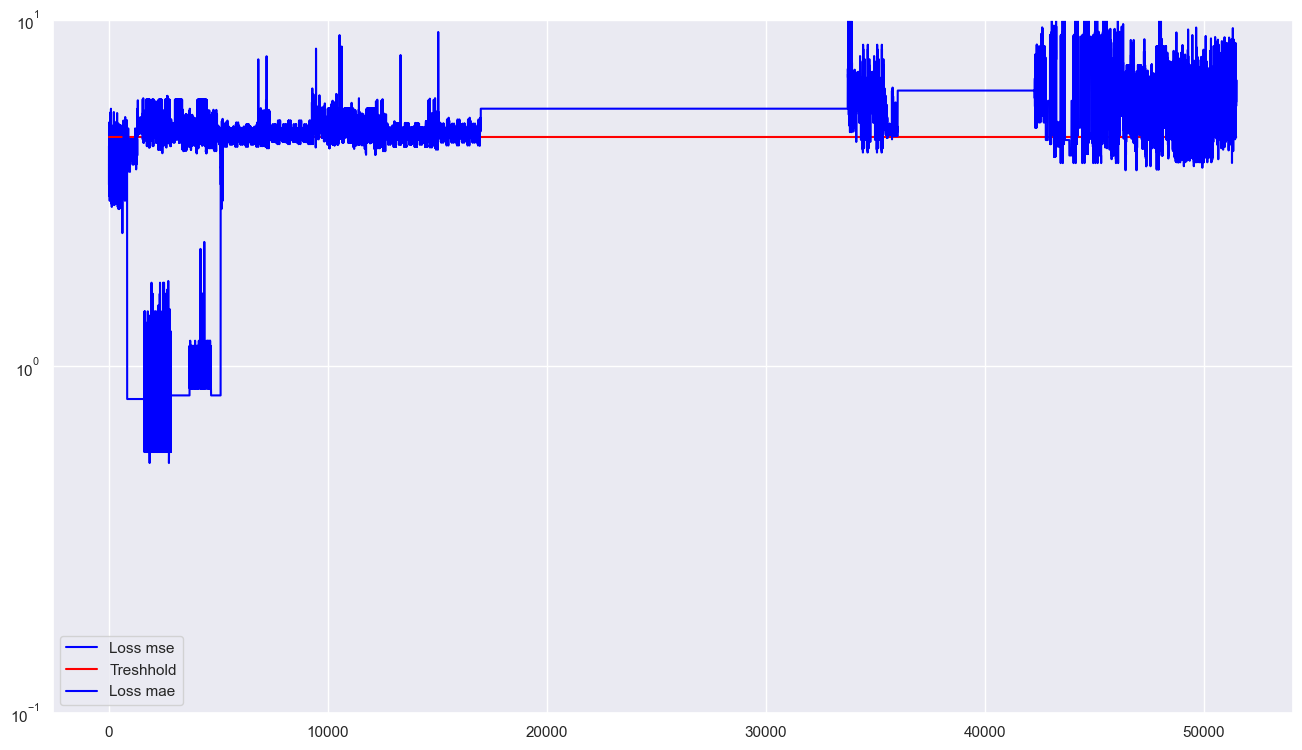

In [170]:
scored1gru.plot(logy = True, figsize = (16,9), ylim = (1e-1,1e1), color = ['blue', 'red'])

In [393]:
# Total Number of Records = 51475
T = 51473
CP = 44367 + 1285
# TN = Records which were really FALSE and predicted FALSE => 1285
TN = 1285

# FP = Records which were really FALSE but predicted TRUE => 14
FP = 14

# FN = Records which were really TRUE but predicted FALSE => 4536
FN = 5807

# TP = Records which were really TRUE and predicted TRUE => 45640
TP = 44367

In [394]:
# Accuracy = (Number of correct predictions) / (Total number of predictions)

Accuracy = CP/T
print(Accuracy)

0.8869115847143162


In [395]:
Recall = TP / (TP+FN)


print(Recall)

0.8842627655757962


In [396]:
Specifity = TN / (TN+FP)


print(Specifity)

0.9892224788298691


In [397]:
Precision = TP / (TP+FP)


print(Precision)

0.9996845496946891


In [398]:
FP_rate = 1 - Specifity


print(FP_rate)

0.010777521170130866


In [392]:
F1_score = 2 * ((Precision * Recall) / (Precision + Recall))

print(F1_score)

0.9383818085668958


In [130]:
def stackautoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    
    lr1 = layers.Dense(50)(inputs)
    lr2 = layers.Dense(25)(lr1)

    lr3 = layers.Dense(25)(lr2)
    lr4 = layers.Dense(50)(lr3)
    
    modelstack = Model(inputs=inputs, outputs=lr4)
    return modelstack

In [131]:
additional_metrics = ['accuracy']
modelstack = stackautoencoder_model(feattrain)
modelstack.compile(optimizer='Nadam', loss='mae', metrics=additional_metrics)
modelstack.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 50)               │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 25)               │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1, 25)               │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1, 50)               │           1,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,775 (22.56 KB)

 Trainable params: 5,775 (22.56 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
historystack = modelstack.fit(feattrain, feattrain, epochs = 7, batch_size=5, validation_split=0.2).history

Epoch 1/7
831/831 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4897 - loss: 2.8948 - val_accuracy: 0.9038 - val_loss: 0.4176
Epoch 2/7
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8017 - loss: 0.6356 - val_accuracy: 0.9086 - val_loss: 0.3285
Epoch 3/7
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8095 - loss: 0.4559 - val_accuracy: 0.9105 - val_loss: 0.2974
Epoch 4/7
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8101 - loss: 0.4036 - val_accuracy: 0.9115 - val_loss: 0.2529
Epoch 5/7
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8160 - loss: 0.3752 - val_accuracy: 0.9201 - val_loss: 0.2332
Epoch 6/7
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8202 - loss: 0.3558 - val_accuracy: 0.9220 - val_loss: 0.2225
Epoch 7/7
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8237 - loss: 0.3386 - val_accuracy: 0.9230 - val_loss: 0.2078


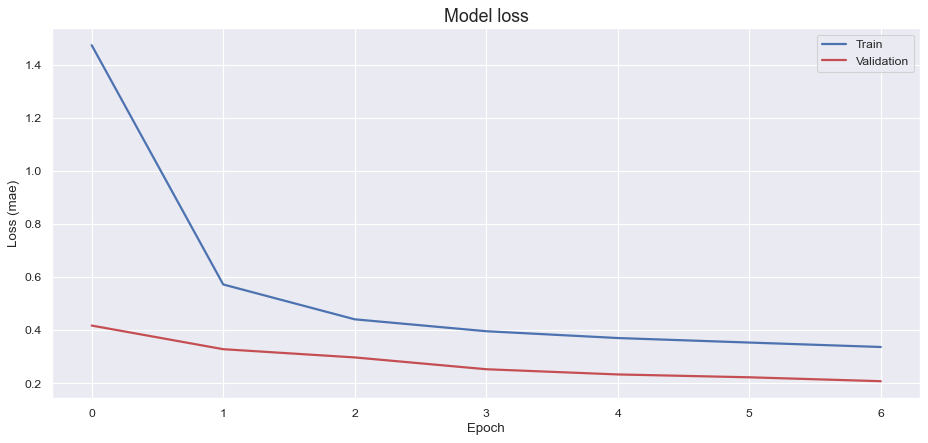

In [133]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(historystack['loss'], 'b', label = 'Train', linewidth = 2)
ax.plot(historystack['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc = 'upper right')
plt.show()

In [134]:
historystack = modelstack.evaluate(feattest, feattest, verbose=1)

1609/1609 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.0989 - loss: 3.5078


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


C:\Users\vbabaey\AppData\Local\Temp\1\ipykernel_26384\3888335130.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored_trainstack['Loss_mae'], bins = 20, kde = True, color = 'blue')


(0.0, 7.0)

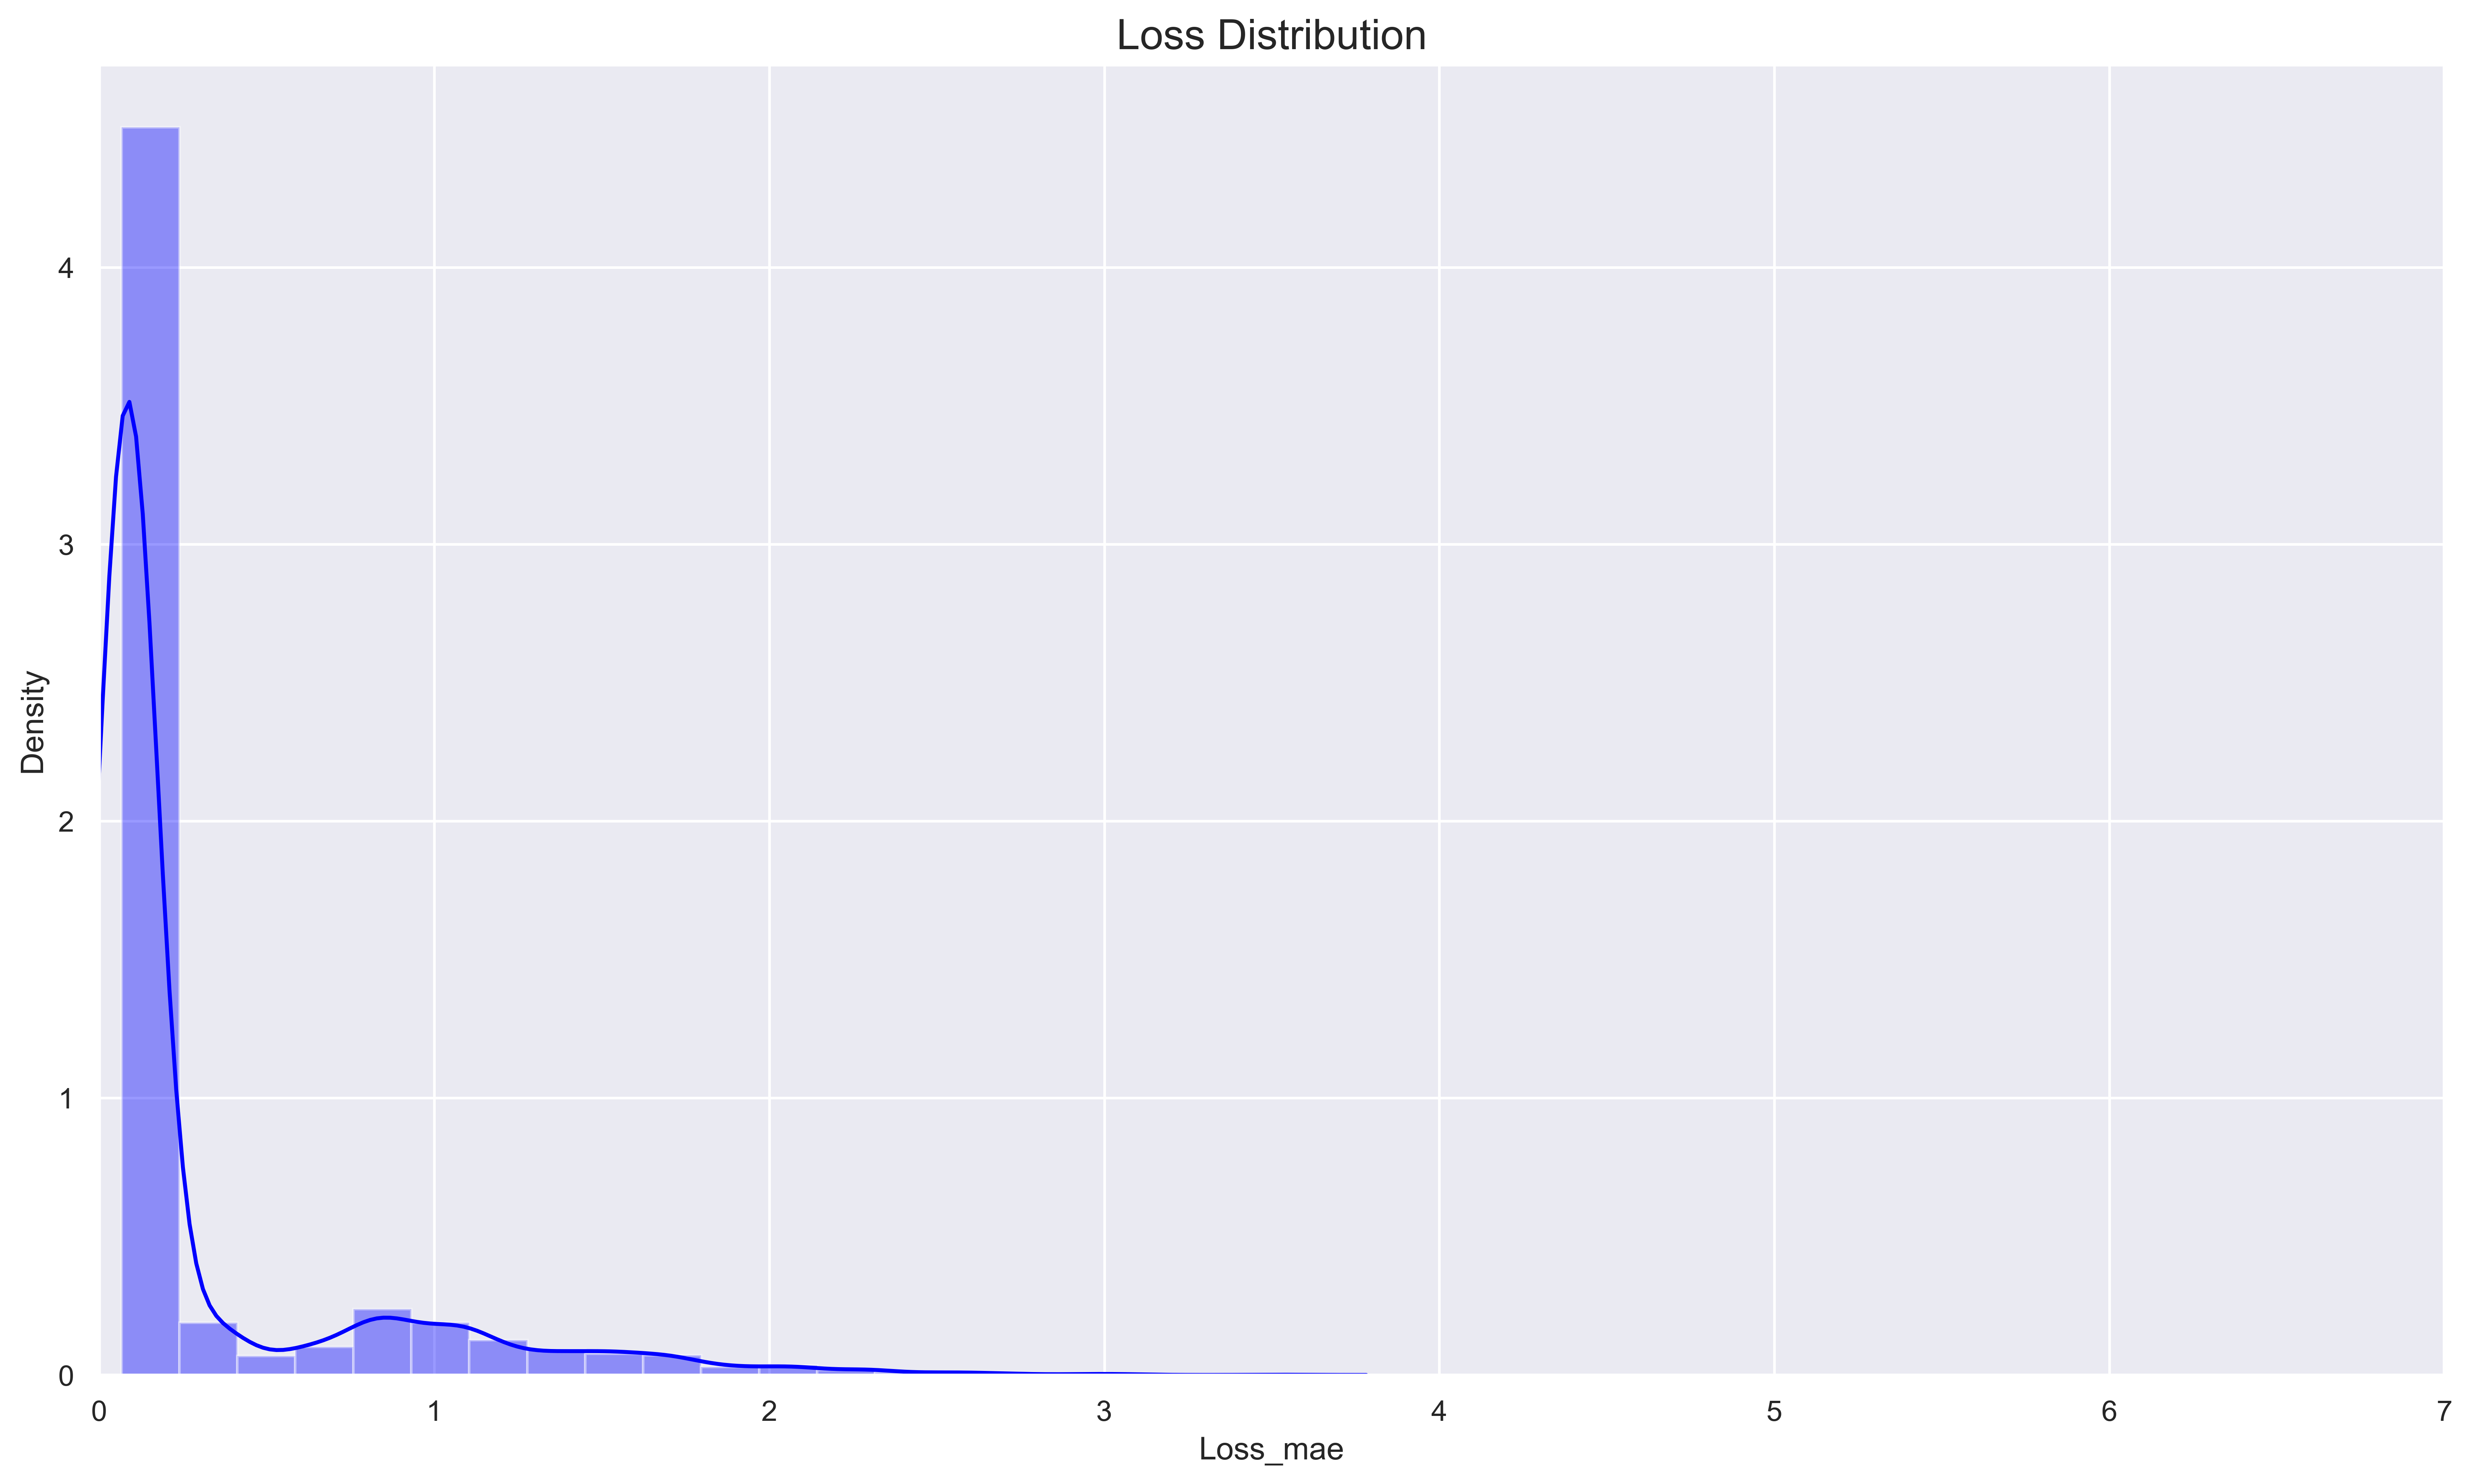

In [135]:
X_pred_train = modelstack.predict(feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_trainstack = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_trainstack['Loss_mae'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=500)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored_trainstack['Loss_mae'], bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,7.0])

In [180]:
tresh = 3.9

In [137]:
X_pred_train = modelstack.predict(feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_trainstack = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_trainstack['Loss mae'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
scored_trainstack['Treshhold'] = tresh
scored_trainstack['Anomaly'] = scored_trainstack['Loss mae'] > scored_trainstack['Treshhold']

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


In [138]:
scored_trainstack.head(10)

,Loss mae,Treshhold,Anomaly
0,0.444454,3.9,False
1,0.650637,3.9,False
2,1.029384,3.9,False
3,0.846340,3.9,False
4,0.362378,3.9,False
5,1.278013,3.9,False
6,2.023219,3.9,False
7,0.650637,3.9,False
8,1.164578,3.9,False
9,1.000140,3.9,False


In [139]:
scored_trainstack['Anomaly'].value_counts()

False    5193
Name: Anomaly, dtype: int64

<Axes: >

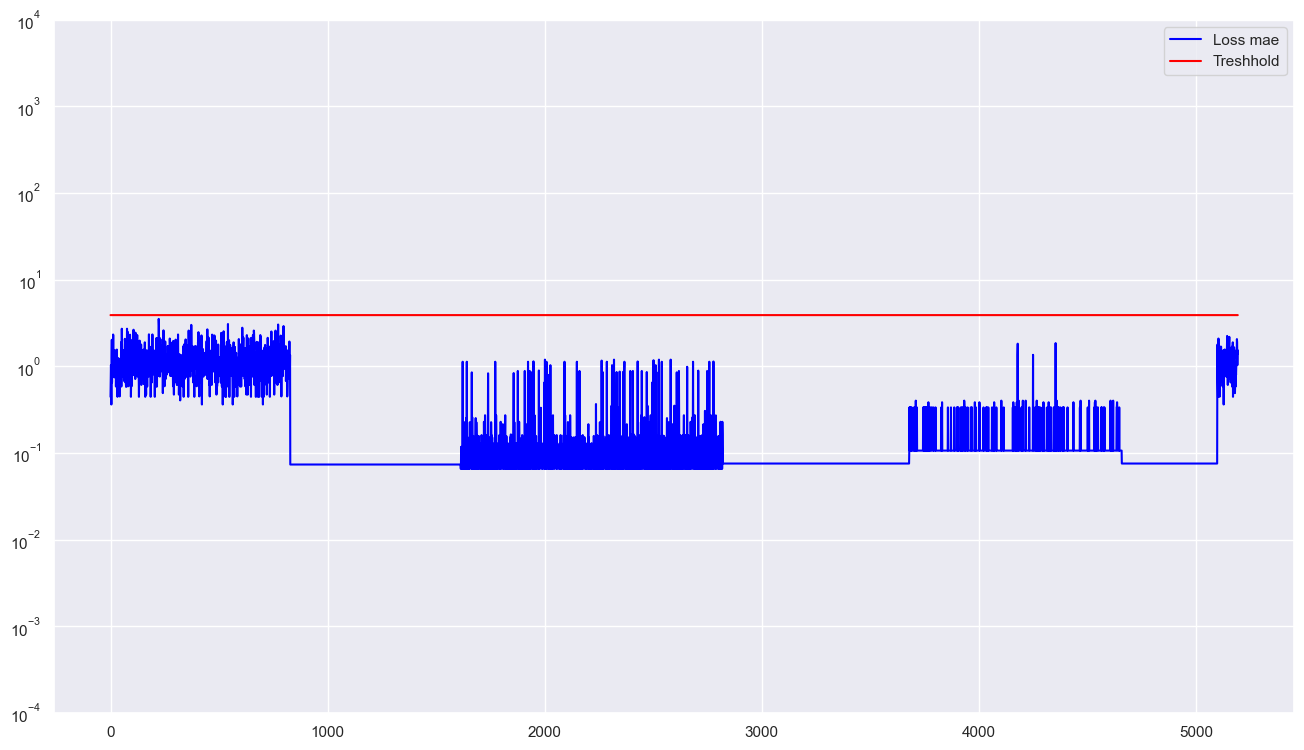

In [140]:
scored_trainstack.plot(logy = True, figsize = (16,9), ylim = (1e-4,1e4), color = ['blue', 'red'])

In [181]:
X_pred = modelstack.predict(feattest)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred)

scoredstack = pd.DataFrame()
Xtest = feattest.reshape(feattest.shape[0], feattest.shape[2])
scoredstack['Loss mae'] = np.mean(np.abs(X_pred - Xtest), axis = 1)
scoredstack['Treshhold'] = tresh
scoredstack['Anomaly'] = scoredstack['Loss mae'] > scoredstack['Treshhold']

1609/1609 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step


In [182]:
scoredstack.head(1200)

,Loss mae,Treshhold,Anomaly
0,3.366074,3.9,False
1,3.366074,3.9,False
2,3.366074,3.9,False
3,3.366074,3.9,False
4,3.366074,3.9,False
...,...,...,...
1195,3.623486,3.9,False
1196,3.623486,3.9,False
1197,3.700899,3.9,False
1198,3.539865,3.9,False


In [183]:
scoredstack['Anomaly'].value_counts()

True     33453
False    18020
Name: Anomaly, dtype: int64

In [184]:
scored1stack = scoredstack.head(1299)

In [185]:
scored1stack['Anomaly'].value_counts()

False    1291
True        8
Name: Anomaly, dtype: int64

In [186]:
scored2stack = scoredstack.tail(50174)

In [187]:
scored2stack['Anomaly'].value_counts()

True     33445
False    16729
Name: Anomaly, dtype: int64

In [399]:
# Total Number of Records = 51475
T = 51473
CP = 33445 + 1291
# TN = Records which were really FALSE and predicted FALSE => 1297
TN = 1291

# FP = Records which were really FALSE but predicted TRUE => 2
FP = 8

# FN = Records which were really TRUE but predicted FALSE => 90
FN = 16729

# TP = Records which were really TRUE and predicted TRUE => 50086
TP = 33445

In [400]:
# Accuracy = (Number of correct predictions) / (Total number of predictions)

Accuracy = CP/T
print(Accuracy)

0.6748392361043654


In [401]:
Recall = TP / (TP+FN)


print(Recall)

0.6665803005540718


In [402]:
Specifity = TN / (TN+FP)


print(Specifity)

0.993841416474211


In [403]:
Precision = TP / (TP+FP)


print(Precision)

0.9997608585179206


In [404]:
FP_rate = 1 - Specifity


print(FP_rate)

0.006158583525789019


In [405]:
F1_score = 2 * ((Precision * Recall) / (Precision + Recall))

print(F1_score)

0.7998612888182046


In [194]:
os.makedirs('models1')

In [195]:
filenamelstm = 'models1/model_' + "lstm" + '.h5'
modellstm.save(filenamelstm)

filenamegru = 'models1/model_' + "gru" + '.h5'
modelgru.save(filenamegru)

filenamestack = 'models1/model_' + "stack" + '.h5'
modelstack.save(filenamestack)

In [196]:
from tensorflow.keras.losses import MeanAbsoluteError

def load_all_models():
    all_models = list()
    filenamelstm = 'models1/model_' + "lstm" + '.h5'
    filenamegru = 'models1/model_' + "gru" + '.h5'
    filenamestack = 'models1/model_' + "stack" + '.h5'
    
    # Load model from file with custom_objects to include 'mae'
    modellstm = load_model(filenamelstm, custom_objects={'mae': MeanAbsoluteError()})
    modelgru = load_model(filenamegru, custom_objects={'mae': MeanAbsoluteError()})
    modelstack = load_model(filenamestack, custom_objects={'mae': MeanAbsoluteError()})
    
    # Add to list of members
    all_models.append(modellstm)
    all_models.append(modelgru)
    all_models.append(modelstack)
    
    return all_models

In [197]:
members = load_all_models()

In [198]:
# define stacked model from multiple member input models
def define_stacked_model(members):
    
    for i in range(len(members)):
        model = members[i]
        for layer in model.layers:
           
            layer.trainable = False
           
            layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
   
    ensemble_visible = [model.input for model in members]
    
    ensemble_outputs = [model.output for model in members]
    merge = concatenate(ensemble_outputs)
    hidden = Dense(50)(merge)
   
    model = Model(inputs=ensemble_visible, outputs=hidden)
    
    plot_model(model, show_shapes=True, to_file='model_graph.png')
    
    model.compile(loss='mae', optimizer='Nadam', metrics=['Accuracy'])
    return model

In [406]:
stacked_model = define_stacked_model(members)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [407]:
plot_model(stacked_model, show_shapes=True, to_file='model_graph.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [203]:
# prepare input data
X = [feattrain for _ in range(len(stacked_model.input))]
# encode output data
inputy_enc = to_categorical(feattrain)
# fit model
histotyensemble = stacked_model.fit(X, feattrain, epochs=90, verbose=1, validation_split=0.2).history

Epoch 1/90
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - Accuracy: 0.4307 - loss: 5.6160 - val_Accuracy: 0.9038 - val_loss: 0.9023
Epoch 2/90
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7608 - loss: 1.2006 - val_Accuracy: 0.9038 - val_loss: 0.4662
Epoch 3/90
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7962 - loss: 0.7559 - val_Accuracy: 0.9038 - val_loss: 0.3472
Epoch 4/90
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7968 - loss: 0.5785 - val_Accuracy: 0.9047 - val_loss: 0.3064
Epoch 5/90
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7993 - loss: 0.4961 - val_Accuracy: 0.9047 - val_loss: 0.2894
Epoch 6/90
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7993 - loss: 0.4453 - val_Accuracy: 0.9047 - val_loss: 0.2755
Epoch 7/90
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.7997 - loss: 0.4149 - val_Accuracy: 0.9076 - val_loss: 0.2639
Epoch 8/90
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8017 - loss: 0.3969 - val_Accuracy: 0

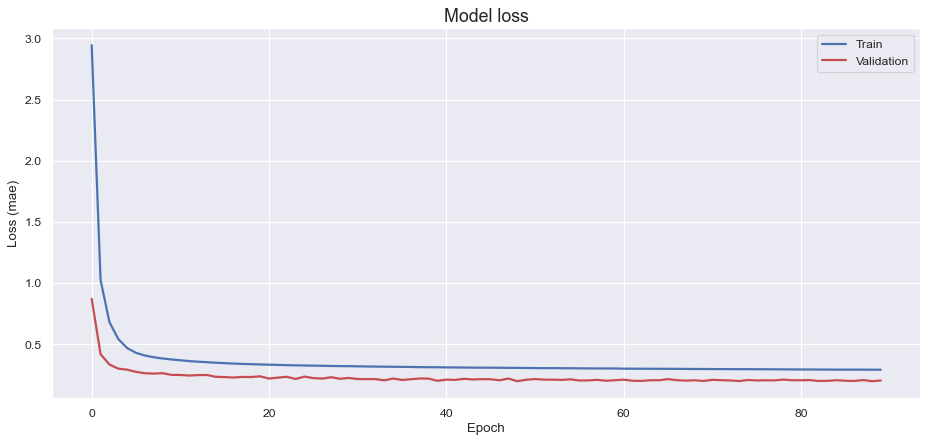

In [210]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(histotyensemble['loss'], 'b', label = 'Train', linewidth = 2)
ax.plot(histotyensemble['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model loss', fontsize = 16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc = 'upper right')
plt.show()

In [211]:
# fit a stacked model
def fit_stacked_model(model, inputX, inputy):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # encode output data
    inputy_enc = to_categorical(inputy)
    # fit model
    model.fit(X, inputy, epochs=90, verbose=1)

In [212]:
# fit stacked model on test dataset
fit_stacked_model(stacked_model, feattrain, feattrain)

Epoch 1/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8348 - loss: 0.2830
Epoch 2/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8351 - loss: 0.2825
Epoch 3/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8347 - loss: 0.2822
Epoch 4/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8350 - loss: 0.2810
Epoch 5/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8352 - loss: 0.2814
Epoch 6/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8341 - loss: 0.2809
Epoch 7/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8357 - loss: 0.2816
Epoch 8/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8359 - loss: 0.2806
Epoch 9/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8356 - loss: 0.2802
Epoch 10/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8353 - loss: 0.2802
Epoch 11/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.8351 - loss: 0.2802
Epoch 12/90
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [204]:
# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
    # prepare input data
    X = [inputX for _ in range(len(model.input))]
    # make prediction
    return model.predict(X, verbose=0)

In [205]:
# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, feattest)

C:\Users\vbabaey\AppData\Local\Temp\1\ipykernel_26384\2757877612.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored_train['Loss_MAE'], bins = 20, kde = True, color = 'blue')


(0.0, 7.0)

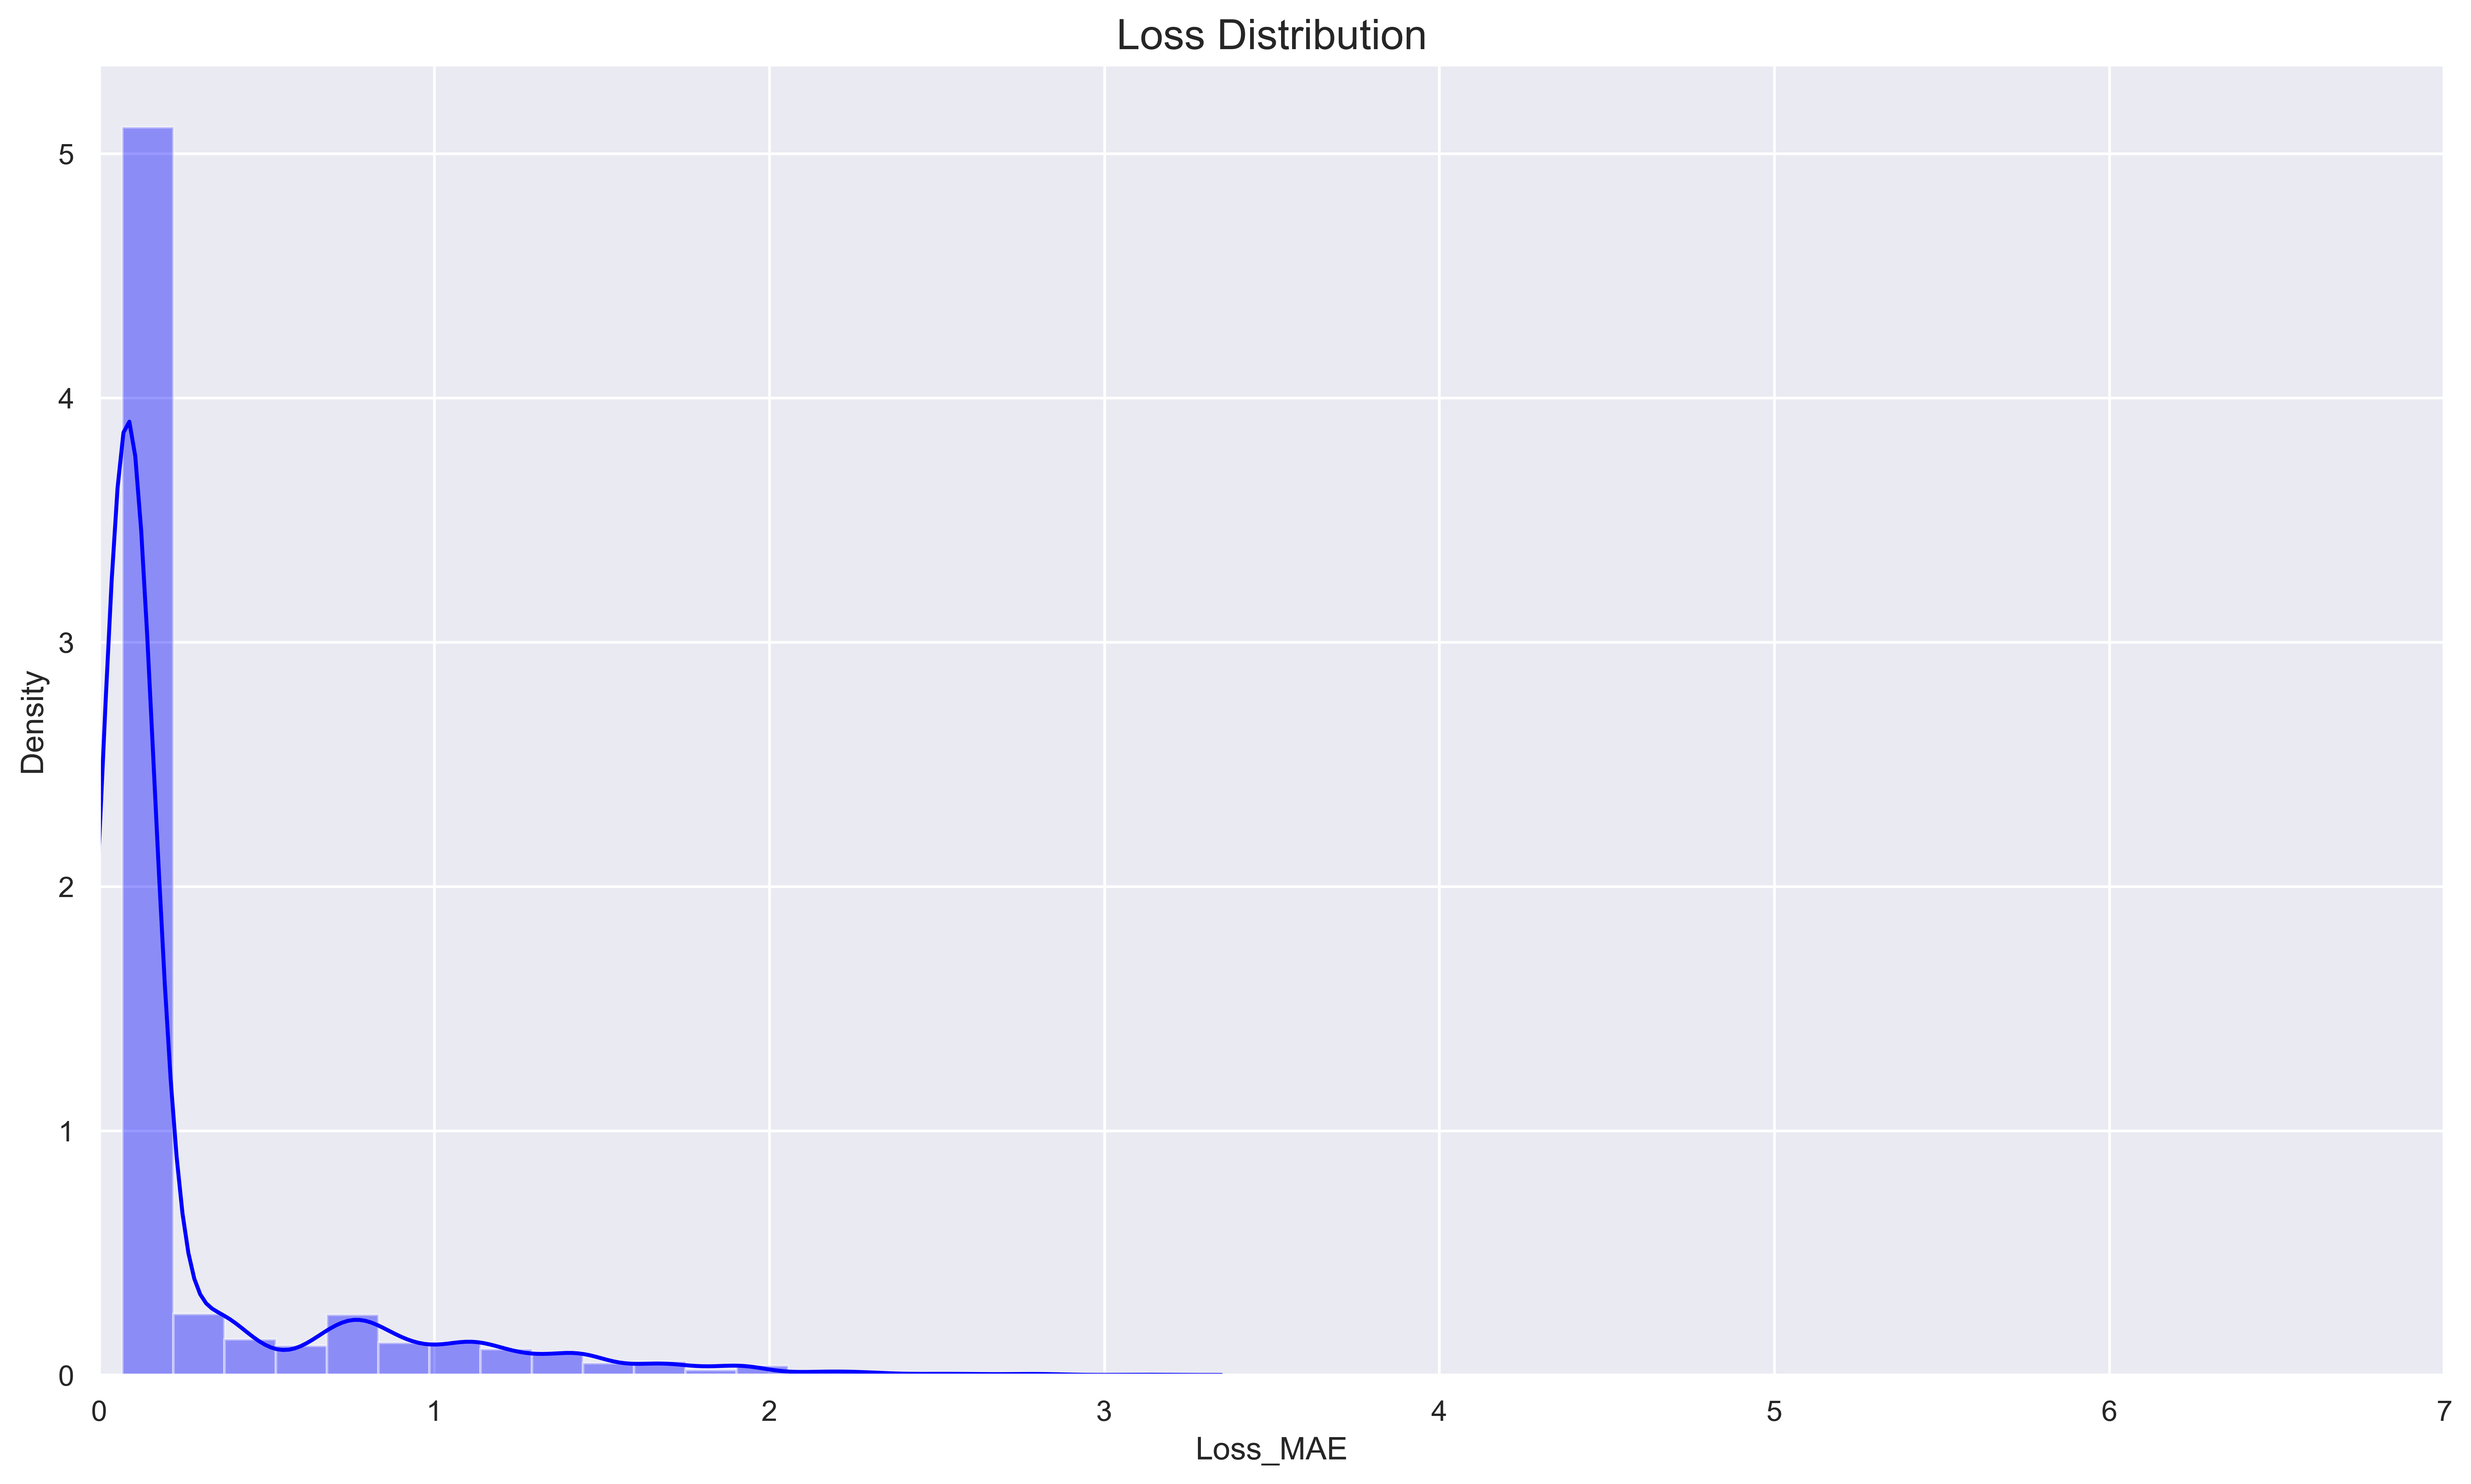

In [206]:
X_pred_train = predict_stacked_model(stacked_model, feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_train = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_train['Loss_MAE'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=500)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored_train['Loss_MAE'], bins = 20, kde = True, color = 'blue')
plt.xlim([0.0,7.0])

In [361]:
tresh = 4.09

In [312]:
X_pred_train = predict_stacked_model(stacked_model, feattrain)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train)

scored_train = pd.DataFrame()
Xtrain = feattrain.reshape(feattrain.shape[0], feattrain.shape[2])
scored_train['Loss MAE'] = np.mean(np.abs(X_pred_train - Xtrain), axis = 1)
scored_train['Threshold'] = tresh
scored_train['Anomaly'] = scored_train['Loss MAE'] > scored_train['Threshold']

In [301]:
scored_train.head(10)

,Loss MAE,Threshold,Anomaly
0,0.174934,4.2,False
1,0.399448,4.2,False
2,1.106726,4.2,False
3,0.673040,4.2,False
4,0.302868,4.2,False
5,1.060500,4.2,False
6,1.790160,4.2,False
7,0.399448,4.2,False
8,1.005019,4.2,False
9,0.710590,4.2,False


In [302]:
scored_train['Anomaly'].value_counts()

False    5193
Name: Anomaly, dtype: int64

<Axes: >

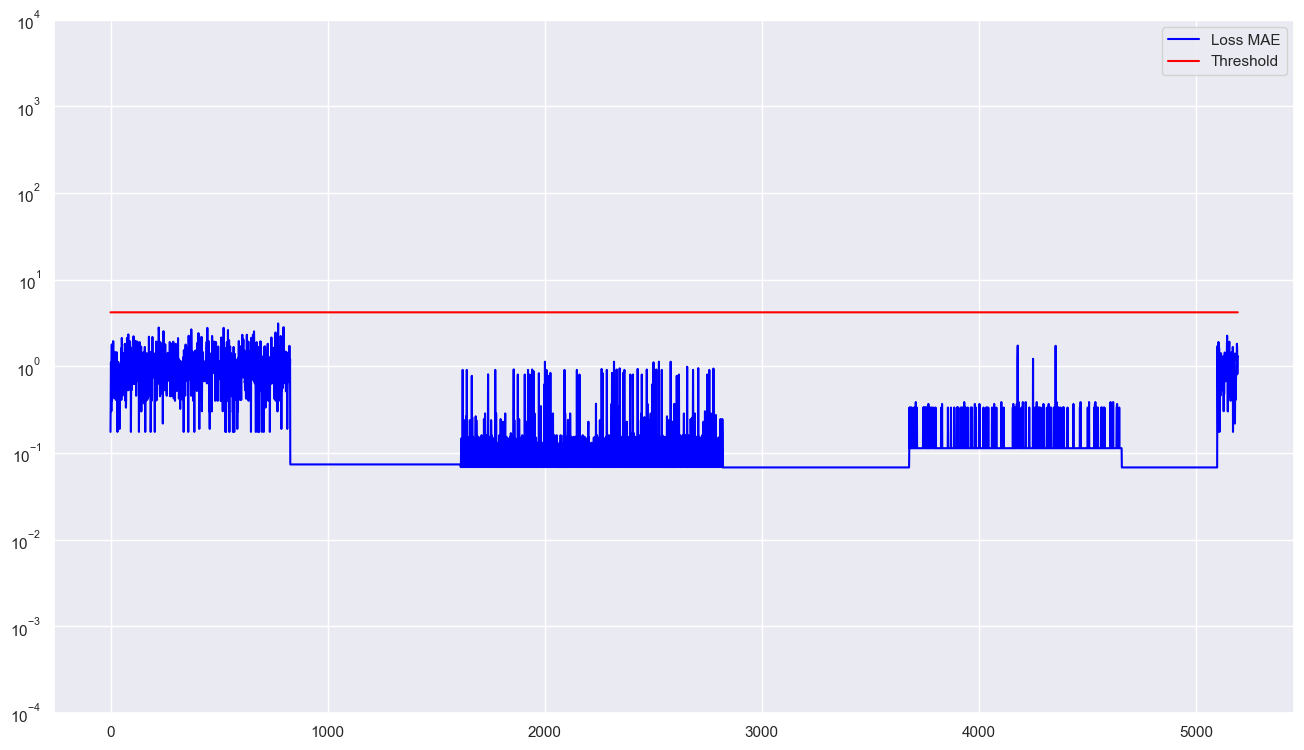

In [303]:
scored_train.plot(logy = True, figsize = (16,9), ylim = (1e-4,1e4), color = ['blue', 'red'])

In [362]:
X_pred = predict_stacked_model(stacked_model, feattest)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred)

scored = pd.DataFrame()
Xtest = feattest.reshape(feattest.shape[0], feattest.shape[2])
scored['Loss MAE'] = np.mean(np.abs(X_pred - Xtest), axis = 1)
scored['Threshold'] = tresh
scored['Anomaly'] = scored['Loss MAE'] > scored['Threshold']

In [363]:
scored.head(40000)

,Loss MAE,Threshold,Anomaly
0,3.490891,4.09,False
1,3.490891,4.09,False
2,3.490891,4.09,False
3,3.490891,4.09,False
4,3.490891,4.09,False
...,...,...,...
39995,5.580345,4.09,True
39996,5.580345,4.09,True
39997,5.580345,4.09,True
39998,5.580345,4.09,True


In [364]:
scored['Anomaly'].value_counts()

True     48937
False     2536
Name: Anomaly, dtype: int64

In [365]:
scored1 = scored.head(1299)

In [366]:
scored1['Anomaly'].value_counts()

False    1296
True        3
Name: Anomaly, dtype: int64

In [367]:
scored2 = scored.tail(50174)

In [368]:
scored2['Anomaly'].value_counts()

True     48934
False     1240
Name: Anomaly, dtype: int64

<Axes: >

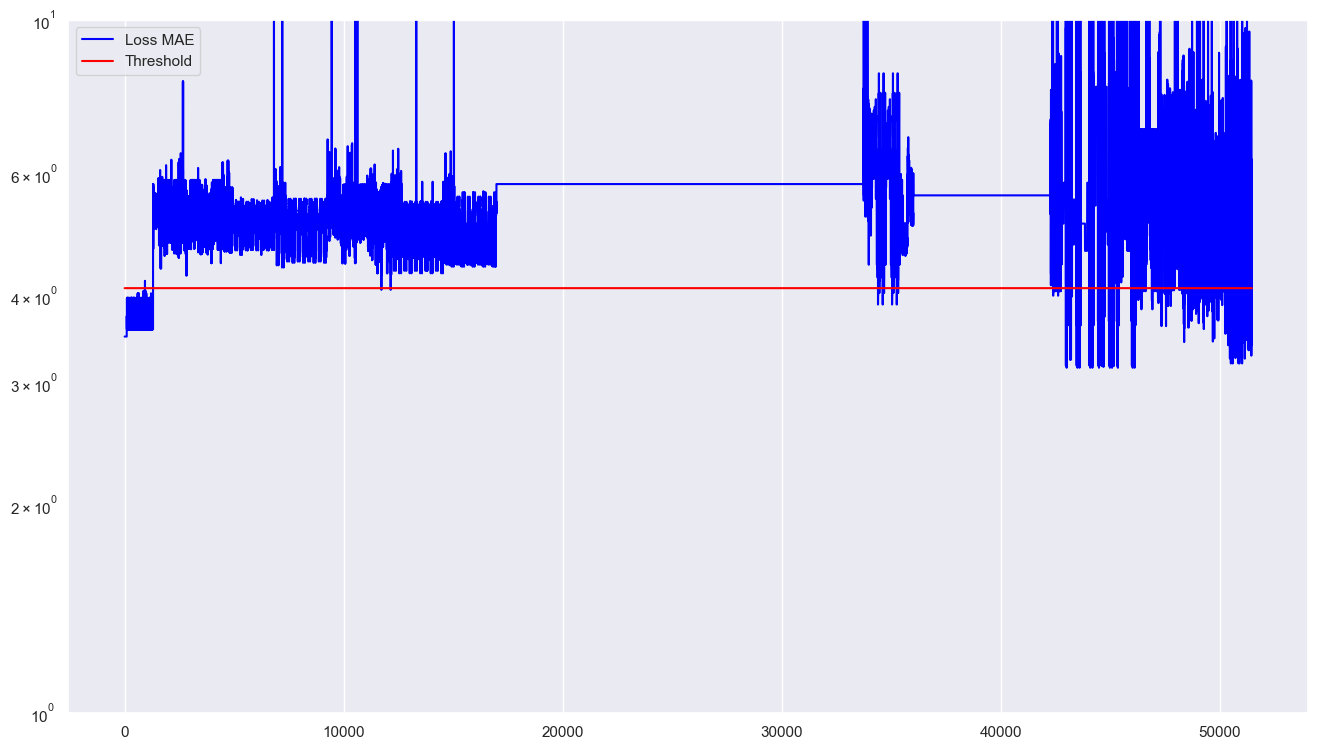

In [345]:
scored.plot(logy = True, figsize = (16,9), ylim = (1e-0,1e1), color = ['blue', 'red'])

In [369]:
# Total Number of Records
T = 51473
CP = 48934 + 1296
# TN = Records which were really Negative and predicted Negative
TN = 1296

# FP = Records which were really Negative but predicted Positive
FP = 3

# FN = Records which were really Positive but predicted Negative => 
FN = 1240

# TP = Records which were really Positive and predicted Positive => 
TP = 48934

In [370]:
# Accuracy = (Number of correct predictions) / (Total number of predictions)

Accuracy = CP/T
print(Accuracy)

0.9758514172478775


In [371]:
Recall = TP / (TP+FN)


print(Recall)

0.9752860047036314


In [372]:
Specifity = TN / (TN+FP)


print(Specifity)

0.9976905311778291


In [373]:
Precision = TP / (TP+FP)


print(Precision)

0.9999386966916648


In [374]:
FP_rate = 1 - Specifity


print(FP_rate)

0.002309468822170868


In [375]:
F1_score = 2 * ((Precision * Recall) / (Precision + Recall))

print(F1_score)

0.9874585061194014
